# Hellas database names exploration

**Goals:**

- See how many town names are repeated
- See how unique names affect town size or vice-versa
- See different name trends in different regions
- See position of names ending in '-aiika' or that contain 'Megalo', 'Palaio', 'Kato', 'Ano'
- See gender and an number distribution 

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

# Change Pandas settings
pd.set_option('display.max_rows', 75)

# Import database
raw_df = pd.read_csv('./files/hellas_db.csv')

sns.set_palette('Set1')

In [2]:
# Keep only relevant columns
relevant_cols = [
    'location', 
    'lat', 'long', 'h',
    'article',
    'perifereia', 'nomos', 'dimos', 'dimenot',
    'original_location_name',
    'legal11', 'facto11', 
    'legal01', 'facto01',
    'legal91', 'facto91',
    'orinotita', 'astikotita', 'island',
    'edra_apok', 'edra_perif', 'edra_nomos', 'edra_dimos'
]

df = raw_df.loc[:, relevant_cols]


In [3]:
# Remove islets without population and monasteries
# Select all rows where the 'original_location_name' column contains the word 'νησίς' (Greek for 'islet')
# and the sum of the population columns for different years is equal to 0
islets_i = df[
    df['original_location_name'].str.contains('νησίς') &
    (df[['facto11', 'legal11', 'facto01', 'legal01', 'facto91', 'legal91']].sum(axis = 1) == 0)
].index.tolist()

# Select all rows where the 'original_location_name' column contains the word 'Μονή' (Greek for 'monastery')
monasteries_i = df[df['original_location_name'].str.contains('Μονή ')].index.tolist()

# Combine the indices of the islets and monasteries to create a list of indices to drop
to_drop_i = islets_i + monasteries_i

# Drop the rows with the selected indices from the DataFrame
df.drop(to_drop_i, inplace = True)

In [4]:
df.nomos.unique()

array(['ΡΟΔΟΠΗΣ', 'ΔΡΑΜΑΣ', 'ΕΒΡΟΥ', 'ΘΑΣΟΥ', 'ΚΑΒΑΛΑΣ', 'ΞΑΝΘΗΣ',
       'ΘΕΣΣΑΛΟΝΙΚΗΣ', 'ΗΜΑΘΙΑΣ', 'ΚΙΛΚΙΣ', 'ΠΕΛΛΑΣ', 'ΠΙΕΡΙΑΣ', 'ΣΕΡΡΩΝ',
       'ΧΑΛΚΙΔΙΚΗΣ', 'ΑΓΙΟ ΟΡΟΣ', 'ΚΟΖΑΝΗΣ', 'ΓΡΕΒΕΝΩΝ', 'ΚΑΣΤΟΡΙΑΣ',
       'ΦΛΩΡΙΝΑΣ', 'ΙΩΑΝΝΙΝΩΝ', 'ΑΡΤΑΣ', 'ΘΕΣΠΡΩΤΙΑΣ', 'ΠΡΕΒΕΖΑΣ',
       'ΛΑΡΙΣΑΣ', 'ΚΑΡΔΙΤΣΑΣ', 'ΜΑΓΝΗΣΙΑΣ', 'ΣΠΟΡΑΔΩΝ', 'ΤΡΙΚΑΛΩΝ',
       'ΦΘΙΩΤΙΔΑΣ', 'ΒΟΙΩΤΙΑΣ', 'ΕΥΒΟΙΑΣ', 'ΕΥΡΥΤΑΝΙΑΣ', 'ΦΩΚΙΔΑΣ',
       'ΚΕΡΚΥΡΑΣ', 'ΖΑΚΥΝΘΟΥ', 'ΙΘΑΚΗΣ', 'ΚΕΦΑΛΛΗΝΙΑΣ', 'ΛΕΥΚΑΔΑΣ',
       'ΑΧΑΪΑΣ', 'ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ', 'ΗΛΕΙΑΣ', 'ΑΡΚΑΔΙΑΣ', 'ΑΡΓΟΛΙΔΑΣ',
       'ΚΟΡΙΝΘΙΑΣ', 'ΛΑΚΩΝΙΑΣ', 'ΜΕΣΣΗΝΙΑΣ', 'ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ',
       'ΒΟΡΕΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ', 'ΔΥΤΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ',
       'ΝΟΤΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ', 'ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ', 'ΔΥΤΙΚΗΣ ΑΤΤΙΚΗΣ',
       'ΠΕΙΡΑΙΩΣ', 'ΝΗΣΩΝ', 'ΛΕΣΒΟΥ', 'ΙΚΑΡΙΑΣ', 'ΛΗΜΝΟΥ', 'ΣΑΜΟΥ',
       'ΧΙΟΥ', 'ΣΥΡΟΥ', 'ΑΝΔΡΟΥ', 'ΘΗΡΑΣ', 'ΚΑΛΥΜΝΟΥ', 'ΚΑΡΠΑΘΟΥ',
       'ΚΕΑΣ - ΚΥΘΝΟΥ', 'ΚΩ', 'ΜΗΛΟΥ', 'ΜΥΚΟΝΟΥ', 'ΝΑΞΟΥ', 'ΠΑΡΟΥ',
       'ΡΟΔΟΥ', 'ΤΗΝΟΥ', 'ΗΡΑΚΛΕΙΟΥ', 'ΛΑΣΙΘΙ

In [5]:
# Add columns with transcribed names
eng_names = {
    'ΡΟΔΟΠΗΣ' : 'Rodopi', 
    'ΔΡΑΜΑΣ' : 'Drama', 
    'ΕΒΡΟΥ' : 'Evros', 
    'ΘΑΣΟΥ' : 'Thasos',
    'ΚΑΒΑΛΑΣ' : 'Kavala', 
    'ΞΑΝΘΗΣ' : 'Xanthi',
    'ΘΕΣΣΑΛΟΝΙΚΗΣ' : 'Thessaloniki', 
    'ΗΜΑΘΙΑΣ' : 'Imathia', 
    'ΚΙΛΚΙΣ' : 'Kilkis', 
    'ΠΕΛΛΑΣ' : 'Pella', 
    'ΠΙΕΡΙΑΣ' : 'Pieria',
    'ΣΕΡΡΩΝ' : 'Serres',
    'ΧΑΛΚΙΔΙΚΗΣ' : 'Chalkidiki', 
    'ΑΓΙΟ ΟΡΟΣ' : 'Mount Athos', 
    'ΚΟΖΑΝΗΣ' : 'Kozani', 
    'ΓΡΕΒΕΝΩΝ' : 'Grevena',
    'ΚΑΣΤΟΡΙΑΣ' : 'Kastoria',
    'ΦΛΩΡΙΝΑΣ' : 'Florina',
    'ΙΩΑΝΝΙΝΩΝ' : 'Ioannina',
    'ΑΡΤΑΣ' : 'Arta',
    'ΘΕΣΠΡΩΤΙΑΣ' : 'Thesprotia', 
    'ΠΡΕΒΕΖΑΣ' : 'Preveza',
    'ΛΑΡΙΣΑΣ' : 'Larisa', 
    'ΚΑΡΔΙΤΣΑΣ' : 'Karditsa', 
    'ΜΑΓΝΗΣΙΑΣ' : 'Magnisia', 
    'ΣΠΟΡΑΔΩΝ' : 'Sporades', 
    'ΤΡΙΚΑΛΩΝ' : 'Trikala',
    'ΦΘΙΩΤΙΔΑΣ' : 'Phthiotis', 
    'ΒΟΙΩΤΙΑΣ' : 'Boeotia', 
    'ΕΥΒΟΙΑΣ' : 'Euboea', 
    'ΕΥΡΥΤΑΝΙΑΣ' : 'Evritania', 
    'ΦΩΚΙΔΑΣ' : 'Phocis',
    'ΚΕΡΚΥΡΑΣ' : 'Kerkyra', 
    'ΖΑΚΥΝΘΟΥ' : 'Zakinthos', 
    'ΙΘΑΚΗΣ' : 'Ithaki', 
    'ΚΕΦΑΛΛΗΝΙΑΣ' :'Kefallonia', 
    'ΛΕΥΚΑΔΑΣ' : 'Lefkada',
    'ΑΧΑΪΑΣ' : 'Achaea', 
    'ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ' : 'Aetolia-Acarnania', 
    'ΗΛΕΙΑΣ' : 'Ilia', 
    'ΑΡΚΑΔΙΑΣ' : 'Arcadia', 
    'ΑΡΓΟΛΙΔΑΣ' : 'Argolida',
    'ΚΟΡΙΝΘΙΑΣ' : 'Corinth', 
    'ΛΑΚΩΝΙΑΣ' : 'Laconia', 
    'ΜΕΣΣΗΝΙΑΣ' : 'Messinia', 
    'ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ' : 'Central Athens',
    'ΒΟΡΕΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ' : 'Northern Athens', 
    'ΔΥΤΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ' : 'Western Athens',
    'ΝΟΤΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ' : 'Southern Athens', 
    'ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ' : 'Eastern Athens', 
    'ΔΥΤΙΚΗΣ ΑΤΤΙΚΗΣ' : 'Western Attica',
    'ΠΕΙΡΑΙΩΣ' : 'Piraeus', 
    'ΝΗΣΩΝ' : 'Islands', 
    'ΛΕΣΒΟΥ' : 'Lesbos', 
    'ΙΚΑΡΙΑΣ' : 'Icaria', 
    'ΛΗΜΝΟΥ' : 'Limnos', 
    'ΣΑΜΟΥ' : 'Samos',
    'ΧΙΟΥ' : 'Chios', 
    'ΣΥΡΟΥ' : 'Syros', 
    'ΑΝΔΡΟΥ' : 'Andros', 
    'ΘΗΡΑΣ' : 'Thira',
    'ΚΑΛΥΜΝΟΥ' : 'Kalymnos', 
    'ΚΑΡΠΑΘΟΥ' : 'Karpathos',
    'ΚΕΑΣ - ΚΥΘΝΟΥ' : 'Kea - Kithnos', 
    'ΚΩ' : 'Kos', 
    'ΜΗΛΟΥ' : 'Milos', 
    'ΜΥΚΟΝΟΥ' : 'Mykonos', 
    'ΝΑΞΟΥ' : 'Naxos', 
    'ΠΑΡΟΥ' : 'Paros',
    'ΡΟΔΟΥ' : 'Rhodes', 
    'ΤΗΝΟΥ' : 'Tinos', 
    'ΗΡΑΚΛΕΙΟΥ' : 'Heraklion', 
    'ΛΑΣΙΘΙΟΥ' : 'Lasithi', 
    'ΡΕΘΥΜΝΟΥ' : 'Rethymno',
    'ΧΑΝΙΩΝ' : 'Chania',

    'ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ' : 'Eastern Macedonia and Thrace', 
    'ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ' : 'Central Macedonia',
    'ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ' : 'Western Macedonia', 
    'ΗΠΕΙΡΟΥ' : 'Epirus', 
    'ΘΕΣΣΑΛΙΑΣ' : 'Thessaly', 
    'ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ' : 'Central Greece',
    'ΙΟΝΙΩΝ ΝΗΣΩΝ' : 'Ionian Islands', 
    'ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ' : 'Western Greece', 
    'ΠΕΛΟΠΟΝΝΗΣΟΥ' : 'Peloponnese',
    'ΑΤΤΙΚΗΣ' : 'Attica',
    'ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ' : 'North Aegean', 
    'ΝΟΤΙΟΥ ΑΙΓΑΙΟΥ' : 'South Aegean', 
    'ΚΡΗΤΗΣ' : 'Crete'
}

esp_names = {
    'ΡΟΔΟΠΗΣ' : 'Ródope', 
    'ΔΡΑΜΑΣ' : 'Drama', 
    'ΕΒΡΟΥ' : 'Evros', 
    'ΘΑΣΟΥ' : 'Tasos',
    'ΚΑΒΑΛΑΣ' : 'Kávala', 
    'ΞΑΝΘΗΣ' : 'Xanthi',
    'ΘΕΣΣΑΛΟΝΙΚΗΣ' : 'Salónica', 
    'ΗΜΑΘΙΑΣ' : 'Emacia', 
    'ΚΙΛΚΙΣ' : 'Kilkís', 
    'ΠΕΛΛΑΣ' : 'Pella', 
    'ΠΙΕΡΙΑΣ' : 'Piería',
    'ΣΕΡΡΩΝ' : 'Serres',
    'ΧΑΛΚΙΔΙΚΗΣ' : 'Calcídica', 
    'ΑΓΙΟ ΟΡΟΣ' : 'Monte Atos', 
    'ΚΟΖΑΝΗΣ' : 'Kozani', 
    'ΓΡΕΒΕΝΩΝ' : 'Grevená',
    'ΚΑΣΤΟΡΙΑΣ' : 'Kastoriá',
    'ΦΛΩΡΙΝΑΣ' : 'Flórina',
    'ΙΩΑΝΝΙΝΩΝ' : 'Ioánnina',
    'ΑΡΤΑΣ' : 'Arta',
    'ΘΕΣΠΡΩΤΙΑΣ' : 'Thesprotia', 
    'ΠΡΕΒΕΖΑΣ' : 'Préveza',
    'ΛΑΡΙΣΑΣ' : 'Lárisa', 
    'ΚΑΡΔΙΤΣΑΣ' : 'Karditsa', 
    'ΜΑΓΝΗΣΙΑΣ' : 'Magnesia', 
    'ΣΠΟΡΑΔΩΝ' : 'Espórades', 
    'ΤΡΙΚΑΛΩΝ' : 'Tríkala',
    'ΦΘΙΩΤΙΔΑΣ' : 'Ftiótide', 
    'ΒΟΙΩΤΙΑΣ' : 'Beocia', 
    'ΕΥΒΟΙΑΣ' : 'Eubea', 
    'ΕΥΡΥΤΑΝΙΑΣ' : 'Euritania', 
    'ΦΩΚΙΔΑΣ' : 'Fócida',
    'ΚΕΡΚΥΡΑΣ' : 'Corfú', 
    'ΖΑΚΥΝΘΟΥ' : 'Zante', 
    'ΙΘΑΚΗΣ' : 'Ítaca', 
    'ΚΕΦΑΛΛΗΝΙΑΣ' :'Cefalonia', 
    'ΛΕΥΚΑΔΑΣ' : 'Lefkada',
    'ΑΧΑΪΑΣ' : 'Acaya', 
    'ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ' : 'Etolia-Acarnania', 
    'ΗΛΕΙΑΣ' : 'Élide', 
    'ΑΡΚΑΔΙΑΣ' : 'Arcadia', 
    'ΑΡΓΟΛΙΔΑΣ' : 'Argólida',
    'ΚΟΡΙΝΘΙΑΣ' : 'Corinto', 
    'ΛΑΚΩΝΙΑΣ' : 'Laconia', 
    'ΜΕΣΣΗΝΙΑΣ' : 'Mesena', 
    'ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ' : 'Atenas central',
    'ΒΟΡΕΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ' : 'Atenas septentrional', 
    'ΔΥΤΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ' : 'Atenas occidental',
    'ΝΟΤΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ' : 'Atenas meridional', 
    'ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ' : 'Atenas oriental', 
    'ΔΥΤΙΚΗΣ ΑΤΤΙΚΗΣ' : 'Ática occidental',
    'ΠΕΙΡΑΙΩΣ' : 'Pireo', 
    'ΝΗΣΩΝ' : 'Islas', 
    'ΛΕΣΒΟΥ' : 'Lesbos', 
    'ΙΚΑΡΙΑΣ' : 'Icaria', 
    'ΛΗΜΝΟΥ' : 'Lemnos', 
    'ΣΑΜΟΥ' : 'Samos',
    'ΧΙΟΥ' : 'Quíos', 
    'ΣΥΡΟΥ' : 'Siros', 
    'ΑΝΔΡΟΥ' : 'Andros', 
    'ΘΗΡΑΣ' : 'Santorini',
    'ΚΑΛΥΜΝΟΥ' : 'Kálimnos', 
    'ΚΑΡΠΑΘΟΥ' : 'Kárpatos',
    'ΚΕΑΣ - ΚΥΘΝΟΥ' : 'Kea - Kithnos', 
    'ΚΩ' : 'Kos', 
    'ΜΗΛΟΥ' : 'Milos', 
    'ΜΥΚΟΝΟΥ' : 'Míkonos', 
    'ΝΑΞΟΥ' : 'Naxos', 
    'ΠΑΡΟΥ' : 'Paros',
    'ΡΟΔΟΥ' : 'Rodas', 
    'ΤΗΝΟΥ' : 'Tinos', 
    'ΗΡΑΚΛΕΙΟΥ' : 'Heraclión', 
    'ΛΑΣΙΘΙΟΥ' : 'Lasithi', 
    'ΡΕΘΥΜΝΟΥ' : 'Rétino',
    'ΧΑΝΙΩΝ' : 'La Canea',

    'ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ' : 'Macedonia Oriental y Tracia', 
    'ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ' : 'Macedonia Central',
    'ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ' : 'Macedonia Occidental', 
    'ΗΠΕΙΡΟΥ' : 'Épiro', 
    'ΘΕΣΣΑΛΙΑΣ' : 'Tesalia', 
    'ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ' : 'Grecia Central',
    'ΙΟΝΙΩΝ ΝΗΣΩΝ' : 'Islas Jónicas', 
    'ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ' : 'Grecia Occidental', 
    'ΠΕΛΟΠΟΝΝΗΣΟΥ' : 'Peloponeso',
    'ΑΤΤΙΚΗΣ' : 'Ática',
    'ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ' : 'Egeo Septentrional', 
    'ΝΟΤΙΟΥ ΑΙΓΑΙΟΥ' : 'Egeo Meridional', 
    'ΚΡΗΤΗΣ' : 'Creta'
}

## Define auxiliary functions

In [6]:
def plot_names_distribution(filter, df = df):
    """Plots a map showing the geographical distribution
    of towns based on specified conditions.

    @filter: a boolean series for rows fulfilling the desired conditions"""

    # Filter towns
    filtered_towns = df[filter].dropna(subset = ['lat', 'long'])

    # Generate map
    map_filtered = folium.Map(location=[38.84, 24.58], tiles='openstreetmap', zoom_start=7)

    for lat, long in zip(filtered_towns['lat'], filtered_towns['long']):
        folium.CircleMarker([lat, long], radius=10, icon=folium.Icon()).add_to(map_filtered)

    return map_filtered


In [7]:
def count_analysis(filter, df = df):
    """Calculates and displays the raw count, proportion within nomos, and proportion as total for a given filter.

    Args:
        filter (str): A string representing the filter to apply to the DataFrame.
        df (pandas.DataFrame): The DataFrame to analyze. Defaults to the global variable `df`.

    Returns:
        None

    """
    base = df[filter]

    ## Analysis by nomos

    # Get raw count
    raw_count = base.groupby('nomos').count()[['location', 'h']]
    result = raw_count.copy()

    # Proportion within nomos
    result['prop_nomos'] = round((raw_count * 100 / df.groupby('nomos').count()[['location', 'h']]).dropna(), 2)['location']

    # Proportion as total
    result['prop_total'] = round((result['location'] * 100 / result['location'].sum()), 2)

    # Drop and rename columns
    result.drop(columns = ['h'], inplace = True)
    result.rename(columns = {'location' : 'raw_count'}, inplace = True)
    result.sort_values(by = 'prop_nomos', ascending= False, inplace = True)

    display(result)

    ## Analysis by perifereia
    # Get raw count
    raw_count = base.groupby('perifereia').count()[['location', 'h']]
    result = raw_count.copy()

    # Proportion within nomos
    result['prop_perifereia'] = round((raw_count * 100 / df.groupby('perifereia').count()[['location', 'h']]).dropna(), 2)['location']

    # Proportion as total
    result['prop_total'] = round((result['location'] * 100 / result['location'].sum()), 2)

    # Drop and rename columns
    result.drop(columns = ['h'], inplace = True)
    result.rename(columns = {'location' : 'raw_count'}, inplace = True)
    result.sort_values(by = 'prop_perifereia', ascending= False, inplace = True)

    display(result)

In [8]:
# Towns ending in -aiika
filter = (df['location'].str.endswith('αίικα') | df['location'].str.endswith('έικα'))
filter = (df['location'].str.endswith('αίικα'))

count_analysis(filter)
plot_names_distribution(filter)

,raw_count,prop_nomos,prop_total
nomos,,,
ΑΧΑΪΑΣ,39,7.59,21.20
ΑΡΓΟΛΙΔΑΣ,13,6.70,7.07
ΣΑΜΟΥ,6,5.45,3.26
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ,26,4.50,14.13
ΗΛΕΙΑΣ,18,4.14,9.78
ΚΟΡΙΝΘΙΑΣ,8,3.79,4.35
ΕΥΡΥΤΑΝΙΑΣ,7,3.76,3.80
ΚΙΛΚΙΣ,4,2.40,2.17
ΖΑΚΥΝΘΟΥ,2,2.38,1.09


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,83,5.44,45.11
ΠΕΛΟΠΟΝΝΗΣΟΥ,44,2.39,23.91
ΙΟΝΙΩΝ ΝΗΣΩΝ,7,1.16,3.80
ΗΠΕΙΡΟΥ,12,1.10,6.52
ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ,6,1.07,3.26
ΘΕΣΣΑΛΙΑΣ,11,1.07,5.98
ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ,12,1.05,6.52
ΑΤΤΙΚΗΣ,3,0.67,1.63
ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,5,0.48,2.72


In [9]:
# Show towns with unique names
filter = df['location'].str.endswith('έικα')

plot_names_distribution(filter)

### Insights:

- "New" towns seen to be more widespread in Macedonia and Thrace

In [10]:
# Towns ending in
filter = df['location'].str.endswith('άτα')
filter = (df['location'].str.endswith('άτα')) & (df['article'] == 'τα' )

count_analysis(filter)
plot_names_distribution(filter)

,raw_count,prop_nomos,prop_total
nomos,,,
ΚΕΦΑΛΛΗΝΙΑΣ,66,46.48,82.50
ΛΕΥΚΑΔΑΣ,4,5.80,5.00
ΚΕΡΚΥΡΑΣ,6,2.01,7.50
ΝΗΣΩΝ,1,0.63,1.25
ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,1,0.54,1.25
ΛΑΚΩΝΙΑΣ,1,0.23,1.25
ΧΑΝΙΩΝ,1,0.21,1.25


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΙΟΝΙΩΝ ΝΗΣΩΝ,76,12.56,95.00
ΑΤΤΙΚΗΣ,2,0.45,2.50
ΚΡΗΤΗΣ,1,0.06,1.25
ΠΕΛΟΠΟΝΝΗΣΟΥ,1,0.05,1.25


In [11]:
# Towns ending in
filter = df['location'].str.endswith('αινα')
filter = (df['location'].str.endswith('αινα')) & (df['article'] == 'η' )


# display(df[filter])
plot_names_distribution(filter)

In [12]:
# Towns ending in
filter = (df['location'].str.endswith('ές')) & (~df['location'].isin(['Καρές', 'Στροβλές']))
filter = (df['location'].str.endswith('ές')) & (df['article'] == 'ο' )

print(df[filter]['article'].unique())
count_analysis(filter)
plot_names_distribution(filter)

# Notes:
# ['Καρές', 'Στροβλές'] are the only femenine plural towns ending in -és in katharévoussa

['ο']


,raw_count,prop_nomos,prop_total
nomos,,,
ΧΑΝΙΩΝ,21,4.41,65.62
ΡΕΘΥΜΝΟΥ,6,2.09,18.75
ΗΡΑΚΛΕΙΟΥ,3,0.65,9.38
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ,1,0.17,3.12
ΜΕΣΣΗΝΙΑΣ,1,0.17,3.12


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΚΡΗΤΗΣ,30,1.94,93.75
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,1,0.07,3.12
ΠΕΛΟΠΟΝΝΗΣΟΥ,1,0.05,3.12


In [13]:
# Towns ending in
filter = df['location'].str.endswith('έ')

count_analysis(filter)
plot_names_distribution(filter)

,raw_count,prop_nomos,prop_total
nomos,,,
ΡΕΘΥΜΝΟΥ,6,2.09,75.0
ΗΡΑΚΛΕΙΟΥ,1,0.22,12.5
ΧΑΝΙΩΝ,1,0.21,12.5


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΚΡΗΤΗΣ,8,0.52,100.0


In [14]:
# Towns ending in
filter = df['location'].str.endswith('οβον')

# Count proportion 
df[filter].groupby('nomos').count
count_analysis(filter)
plot_names_distribution(filter)

,raw_count,prop_nomos,prop_total
nomos,,,
ΙΩΑΝΝΙΝΩΝ,8,1.62,50.00
ΦΛΩΡΙΝΑΣ,1,0.95,6.25
ΠΡΕΒΕΖΑΣ,1,0.72,6.25
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ,3,0.52,18.75
ΚΑΡΔΙΤΣΑΣ,1,0.36,6.25
ΑΡΤΑΣ,1,0.35,6.25
ΜΕΣΣΗΝΙΑΣ,1,0.17,6.25


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΗΠΕΙΡΟΥ,10,0.92,62.50
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,3,0.20,18.75
ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,1,0.18,6.25
ΘΕΣΣΑΛΙΑΣ,1,0.10,6.25
ΠΕΛΟΠΟΝΝΗΣΟΥ,1,0.05,6.25


In [15]:
# Towns ending in
filter = df['location'].str.endswith('αίοι')

display(count_analysis(filter))
plot_names_distribution(filter)

,raw_count,prop_nomos,prop_total
nomos,,,
ΣΑΜΟΥ,5,4.55,19.23
ΓΡΕΒΕΝΩΝ,3,2.70,11.54
ΑΝΔΡΟΥ,2,2.41,7.69
ΕΥΒΟΙΑΣ,6,1.46,23.08
ΙΩΑΝΝΙΝΩΝ,6,1.21,23.08
ΝΗΣΩΝ,1,0.63,3.85
ΘΕΣΠΡΩΤΙΑΣ,1,0.57,3.85
ΑΡΚΑΔΙΑΣ,2,0.49,7.69


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ,5,0.89,19.23
ΗΠΕΙΡΟΥ,7,0.64,26.92
ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,3,0.54,11.54
ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ,6,0.53,23.08
ΝΟΤΙΟΥ ΑΙΓΑΙΟΥ,2,0.28,7.69
ΑΤΤΙΚΗΣ,1,0.22,3.85
ΠΕΛΟΠΟΝΝΗΣΟΥ,2,0.11,7.69


None

In [16]:
# Towns ending in
filter = df['location'].str.endswith('ού')

display(plot_names_distribution(filter))
print(df[filter].head()['location'])

234        Κάτω Βροντού
841            Κοκκαλού
910           Γερακαρού
1409    Παραλία Κορινού
1434    Καλύβια Βαρικού
Name: location, dtype: object


In [17]:
# Towns ending in
filter = df['location'].str.endswith('άνικα')


count_analysis(filter)
plot_names_distribution(filter)

,raw_count,prop_nomos,prop_total
nomos,,,
ΝΗΣΩΝ,15,9.43,41.67
ΛΑΚΩΝΙΑΣ,15,3.43,41.67
ΚΟΡΙΝΘΙΑΣ,3,1.42,8.33
ΜΕΣΣΗΝΙΑΣ,2,0.34,5.56
ΑΧΑΪΑΣ,1,0.19,2.78


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΑΤΤΙΚΗΣ,15,3.36,41.67
ΠΕΛΟΠΟΝΝΗΣΟΥ,20,1.08,55.56
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,1,0.07,2.78


In [18]:
# Towns ending in
filter = df['location'].str.endswith('άτικα')
filter = (df['location'].str.endswith('άτικα')) & (df['article'] == 'τα' )

count_analysis(filter)
plot_names_distribution(filter)

,raw_count,prop_nomos,prop_total
nomos,,,
ΚΕΡΚΥΡΑΣ,28,9.40,77.78
ΛΕΥΚΑΔΑΣ,1,1.45,2.78
ΘΕΣΠΡΩΤΙΑΣ,2,1.15,5.56
ΚΟΡΙΝΘΙΑΣ,2,0.95,5.56
ΜΑΓΝΗΣΙΑΣ,1,0.51,2.78
ΑΡΚΑΔΙΑΣ,1,0.24,2.78
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ,1,0.17,2.78


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΙΟΝΙΩΝ ΝΗΣΩΝ,29,4.79,80.56
ΗΠΕΙΡΟΥ,2,0.18,5.56
ΠΕΛΟΠΟΝΝΗΣΟΥ,3,0.16,8.33
ΘΕΣΣΑΛΙΑΣ,1,0.10,2.78
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,1,0.07,2.78


In [19]:
# Towns ending in
filter = df['location'].str.endswith('άτικα')
filter = (df['location'].str.endswith('ανά')) & (df['article'] == 'τα' )

count_analysis(filter)
plot_names_distribution(filter)

,raw_count,prop_nomos,prop_total
nomos,,,
ΧΑΝΙΩΝ,71,14.92,45.22
ΡΕΘΥΜΝΟΥ,22,7.67,14.01
ΗΡΑΚΛΕΙΟΥ,16,3.46,10.19
ΕΥΡΥΤΑΝΙΑΣ,5,2.69,3.18
ΑΡΤΑΣ,6,2.13,3.82
ΚΑΡΔΙΤΣΑΣ,5,1.79,3.18
ΛΑΣΙΘΙΟΥ,5,1.55,3.18
ΠΕΛΛΑΣ,2,1.53,1.27
ΝΗΣΩΝ,2,1.26,1.27


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΚΡΗΤΗΣ,114,7.37,72.61
ΗΠΕΙΡΟΥ,11,1.01,7.01
ΘΕΣΣΑΛΙΑΣ,6,0.58,3.82
ΑΤΤΙΚΗΣ,2,0.45,1.27
ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ,5,0.44,3.18
ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,4,0.38,2.55
ΙΟΝΙΩΝ ΝΗΣΩΝ,2,0.33,1.27
ΠΕΛΟΠΟΝΝΗΣΟΥ,5,0.27,3.18
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,4,0.26,2.55


In [20]:
# Towns ending in
filter = df['location'].str.startswith('Μπ')

display(plot_names_distribution(filter))
print(df[filter].head()['location'])

954        Μπαλαίικα
1188       Μπακαίικα
1748    Μπουλαμάτσια
2460          Μπάφρα
2602         Μπέρκον
Name: location, dtype: object


In [21]:
# Towns ending in
filter = df['location'].str.contains('σσ')

display(count_analysis(filter))
display(plot_names_distribution(filter))
print(df[filter].head()['location'])

,raw_count,prop_nomos,prop_total
nomos,,,
ΒΟΡΕΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,2,9.52,0.96
ΣΥΡΟΥ,2,6.25,0.96
ΚΕΑΣ - ΚΥΘΝΟΥ,3,5.56,1.44
ΝΑΞΟΥ,5,5.15,2.40
ΧΑΛΚΙΔΙΚΗΣ,7,4.05,3.37
ΛΑΡΙΣΑΣ,11,3.91,5.29
ΠΕΛΛΑΣ,5,3.82,2.40
ΛΗΜΝΟΥ,2,3.77,0.96
ΚΟΡΙΝΘΙΑΣ,7,3.32,3.37


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,26,2.47,12.50
ΘΕΣΣΑΛΙΑΣ,21,2.04,10.10
ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ,11,1.96,5.29
ΝΟΤΙΟΥ ΑΙΓΑΙΟΥ,14,1.96,6.73
ΠΕΛΟΠΟΝΝΗΣΟΥ,33,1.79,15.87
ΗΠΕΙΡΟΥ,18,1.65,8.65
ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,13,1.64,6.25
ΚΡΗΤΗΣ,25,1.62,12.02
ΑΤΤΙΚΗΣ,6,1.34,2.88


None

30      Μεσσούνη
64        Πάσσος
138    Κασσιτερά
291    Πετρούσσα
396    Νέα Βύσσα
Name: location, dtype: object


In [22]:
# Towns containing "Palios/a/ó"
filter = df['location'].str.startswith('Παλαι')

plot_names_distribution(filter)

In [23]:
# Towns containing "Νέος/α/ο/οι/ες"
filter = df['location'].str.match('Νέ[(ος)αο(οι)(ες)]')

count_analysis(filter)
plot_names_distribution(filter)

,raw_count,prop_nomos,prop_total
nomos,,,
ΒΟΡΕΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,4,19.05,1.88
ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,2,18.18,0.94
ΝΟΤΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,1,10.00,0.47
ΠΙΕΡΙΑΣ,8,8.99,3.76
ΧΑΛΚΙΔΙΚΗΣ,14,8.09,6.57
ΔΥΤΙΚΗΣ ΑΤΤΙΚΗΣ,3,6.82,1.41
ΘΕΣΣΑΛΟΝΙΚΗΣ,12,6.74,5.63
ΣΕΡΡΩΝ,11,5.79,5.16
ΚΑΒΑΛΑΣ,6,5.22,2.82


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,59,5.61,27.70
ΑΤΤΙΚΗΣ,17,3.80,7.98
ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,21,2.64,9.86
ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,12,2.18,5.63
ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ,20,1.75,9.39
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,20,1.31,9.39
ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ,7,1.25,3.29
ΗΠΕΙΡΟΥ,13,1.19,6.10
ΘΕΣΣΑΛΙΑΣ,12,1.16,5.63


## Analysing Agioi

In [24]:
# Find towns starting with 'Agios/a/oi"

filter = df['location'].str.startswith('Άγι')

count_analysis(filter)
plot_names_distribution(filter)

,raw_count,prop_nomos,prop_total
nomos,,,
ΜΥΚΟΝΟΥ,2,14.29,0.33
ΠΕΙΡΑΙΩΣ,1,14.29,0.16
ΜΑΓΝΗΣΙΑΣ,25,12.69,4.10
ΒΟΙΩΤΙΑΣ,14,11.67,2.30
ΛΗΜΝΟΥ,6,11.32,0.98
ΔΥΤΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,1,11.11,0.16
ΝΟΤΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,1,10.00,0.16
ΚΕΑΣ - ΚΥΘΝΟΥ,5,9.26,0.82
ΔΥΤΙΚΗΣ ΑΤΤΙΚΗΣ,4,9.09,0.66


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΑΤΤΙΚΗΣ,32,7.16,5.25
ΙΟΝΙΩΝ ΝΗΣΩΝ,43,7.11,7.05
ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ,31,5.52,5.08
ΝΟΤΙΟΥ ΑΙΓΑΙΟΥ,39,5.45,6.39
ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ,61,5.35,10.00
ΘΕΣΣΑΛΙΑΣ,53,5.14,8.69
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,77,5.04,12.62
ΠΕΛΟΠΟΝΝΗΣΟΥ,93,5.04,15.25
ΚΡΗΤΗΣ,72,4.65,11.80


In [25]:
# Grup by number of towns starting with "Agios*" per nomos
agios_count = df[df['location'].str.startswith('Άγι')].groupby('nomos').count().sort_values(by = 'location')[['location', 'h']]
print(f'Total Agios count: {agios_count["location"].sum()}')
print(f'Total Agios proportion: {agios_count["location"].sum() * 100 / len(df)}')
agios_count

Total Agios count: 610
Total Agios proportion: 4.727216367017979


,location,h
nomos,,
ΚΩ,1,1
ΙΘΑΚΗΣ,1,1
ΞΑΝΘΗΣ,1,1
ΝΟΤΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,1,1
ΣΥΡΟΥ,1,1
ΣΠΟΡΑΔΩΝ,1,1
ΔΥΤΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,1,1
ΠΕΙΡΑΙΩΣ,1,1
ΡΟΔΟΠΗΣ,2,2


In [26]:
# Get number of town starting with "Agios" as a proportion of towns of the nomos
total_towns_count = df.groupby('nomos').count()[['location', 'h']]

total_agios_df = total_towns_count.join(agios_count, how = 'left', lsuffix = '_total', rsuffix = '_agios')[['location_total', 'location_agios']].fillna(0)
total_agios_df['proportion'] = total_agios_df['location_agios'] * 100 / total_agios_df['location_total']
total_agios_df.sort_values(by = 'proportion', ascending= False).head(50)

,location_total,location_agios,proportion
nomos,,,
ΜΥΚΟΝΟΥ,14,2.0,14.285714
ΠΕΙΡΑΙΩΣ,7,1.0,14.285714
ΜΑΓΝΗΣΙΑΣ,197,25.0,12.690355
ΒΟΙΩΤΙΑΣ,120,14.0,11.666667
ΛΗΜΝΟΥ,53,6.0,11.320755
ΔΥΤΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,9,1.0,11.111111
ΝΟΤΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,10,1.0,10.000000
ΚΕΑΣ - ΚΥΘΝΟΥ,54,5.0,9.259259
ΔΥΤΙΚΗΣ ΑΤΤΙΚΗΣ,44,4.0,9.090909


In [27]:
# Get nomoi without a single town named "Agios"
list(set(df['nomos'].unique().tolist()) - set(agios_count.index.tolist()))

['ΑΓΙΟ ΟΡΟΣ',
 'ΚΑΛΥΜΝΟΥ',
 'ΒΟΡΕΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ',
 'ΕΒΡΟΥ',
 'ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ',
 'ΘΑΣΟΥ']

### Insights

- There are 610 locations named after saints (excluding monasteries and uninhabited islets), which equals to roughly 1 in every 20 locations in all Greece (4,72 %)
- There are three nomoi in which more than 10 % of the locations are named after saints: Mykonos (14,3 %), Magnisia (12,7 %), Boeothia (11,7 %) and Limnos (11,3 %). 
- Thasos, Evros and Kalymnos are the only nomoi without a single town named Agios

## Analaysing repeated names

In [28]:
len(df)

12904

,article,legal11
location,,
Άγιος Γεώργιος,84,84
Άγιος Νικόλαος,61,61
Αγία Παρασκευή,52,52
Νεοχώριον,51,51
Άγιος Ιωάννης,48,48
Άγιος Δημήτριος,41,41
Καλλιθέα,39,39
Κάμπος,38,38
Παλαιοχώριον,33,33


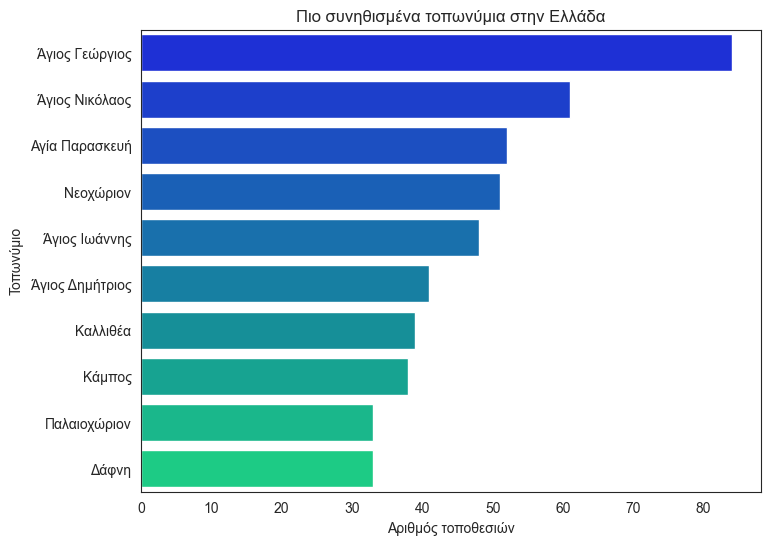

In [29]:
# El pueblo más repetido de Grecia
sns.set_style('white')
sns.set_palette('winter')
most_freq = df.groupby('location').count().sort_values(by = 'article', ascending= False).head(10)[['article', 'legal11']]
plt.figure(figsize = (8, 6))
# plt.title('Most frequent town names in Greece')

# In Greek
fig = sns.barplot(y = most_freq.index, x = most_freq['article'], palette = 'winter')

# In latin characters
# x = ['Agios Georgios', 'Agios Nikolaos', 'Agia Paraskevi', 'Neochori', 'Agios Ioannis', 'Agios Dimitrios', 'Kallithea', 'Kampos', 'Palaiochori', 'Dafni']
# fig = sns.barplot(x = most_freq['article'], y = x, palette = 'winter')

# plt.xticks(rotation = 90)
fig.set_title('Most frequent town names in Greece')
fig.set_title('Topónimos más frecuentes en Grecia')
fig.set_title('Πιο συνηθισμένα τοπωνύμια στην Ελλάδα')
fig.set_xlabel('Quantity')
fig.set_xlabel('Número de pueblos')
fig.set_xlabel('Αριθμός τοποθεσιών')
fig.set_ylabel('Name')
fig.set_ylabel('Topónimo')
fig.set_ylabel('Τοπωνύμιο')

# fig.set_xlabel('Όνομα')
# fig.set_ylabel('Ποσότητα')

most_freq

In [30]:
# Build the Plotly version in Greek
temp_df = (most_freq
           .reset_index()
           .rename(columns = {'location': 'Τοπωνύμιο', 'article': 'Ποσότητα'})
           .sort_values(by = 'Ποσότητα', ascending = True)
           .copy())

# Plot the figure
fig = px.bar(
    temp_df, 
    x = 'Ποσότητα', 
    y = 'Τοπωνύμιο', 
    orientation = 'h', 
    title = 'Πιο συνηθισμένα τοπωνύμια στην Ελλάδα',

    color = 'Ποσότητα',
    color_continuous_scale = 'Tealgrn',
    range_color = [0, temp_df['Ποσότητα'].max() + 1],
    )

# Center the title
fig.update_layout(title_x = 0.5)

# Add text labels
fig.update_traces(text=temp_df['Ποσότητα'], textposition='outside')

# Customize text font and size
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    font=dict(size=12)
)

# Add a text watermark
fig.add_annotation(
    text = 'Πηγή: HellasDB - Jaime García Chaparro',
    xref = 'paper',
    yref = 'paper',
    x = 1.0,
    y = -0.2,
    showarrow = False,
    font = dict(size = 10)
)

fig.show()

In [31]:
df.groupby('location').count().sort_values(by = 'h', ascending= False).head(50)[['article', 'legal11']].sum() / len(df)

article    0.091212
legal11    0.091212
dtype: float64

In [32]:
# Get towns with unique names
town_count = df.groupby('location').count().sort_values(by = 'orinotita')
unique_towns = town_count[town_count['legal11'] == 1].sort_values(by = 'location').index.tolist()
len(unique_towns)

7724

In [33]:
# Show distribution of names ending in -έα only for unique names
filter = (df['location'].isin(unique_towns) & df['location'].str.endswith('έα'))

plot_names_distribution(filter)

In [34]:
df.head()

,location,lat,long,h,article,perifereia,nomos,dimos,dimenot,original_location_name,...,facto01,legal91,facto91,orinotita,astikotita,island,edra_apok,edra_perif,edra_nomos,edra_dimos
0,Κομοτηνή,41.117798,25.401886,65.0,η,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΡΟΔΟΠΗΣ,ΚΟΜΟΤΗΝΗΣ,ΚΟΜΟΤΗΝΗΣ,"Κομοτηνή,η",...,43326,38532,37036,0,True,False,True,True,True,True
1,Ήφαιστος,41.128242,25.382959,42.0,ο,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΡΟΔΟΠΗΣ,ΚΟΜΟΤΗΝΗΣ,ΚΟΜΟΤΗΝΗΣ,"Ήφαιστος,ο",...,1519,1263,1285,0,True,False,False,False,False,False
2,Μέγα Κρανοβούνιον,41.058743,25.331539,29.0,το,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΡΟΔΟΠΗΣ,ΚΟΜΟΤΗΝΗΣ,ΚΟΜΟΤΗΝΗΣ,"Μέγα Κρανοβούνιον,το",...,227,296,302,0,True,False,False,False,False,False
3,Μεσοχώριον,41.091614,25.354307,40.0,το,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΡΟΔΟΠΗΣ,ΚΟΜΟΤΗΝΗΣ,ΚΟΜΟΤΗΝΗΣ,"Μεσοχώριον,το",...,161,151,154,0,True,False,False,False,False,False
4,Μικρόν Κρανοβούνιον,41.051556,25.332031,21.0,το,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΡΟΔΟΠΗΣ,ΚΟΜΟΤΗΝΗΣ,ΚΟΜΟΤΗΝΗΣ,"Μικρόν Κρανοβούνιον,το",...,198,215,227,0,True,False,False,False,False,False


In [35]:
# Get towns with a name repeated only once
town_count = df.groupby('location').count().sort_values(by = 'h')
quasiunique_towns = town_count[town_count['nomos'] < 2].sort_values(by = 'location').index.tolist()
quasiunique_towns

['Άβας',
 'Άβατον',
 'Άβδηρα',
 'Άβορος',
 'Άγιαι Παρασκιαί',
 'Άγιο Πνεύμα',
 'Άγιοι',
 'Άγιοι Απόστολοι Βαλσαμάτων',
 'Άγιοι Ασώματοι',
 'Άγιοι Δημήτριος και Παντελεήμων',
 'Άγιοι Δούλοι',
 'Άγιοι Σαράντα',
 'Άγιοι Ταξιάρχαι',
 'Άγιον Γάλα',
 'Άγιος Αδριανός',
 'Άγιος Ακάκιος',
 'Άγιος Αλέξανδρος',
 'Άγιος Απόστολος ο Νέος',
 'Άγιος Αυγουστίνος',
 'Άγιος Αχίλλειος',
 'Άγιος Βαρθολομαίος',
 'Άγιος Βησσάριος',
 'Άγιος Βησσαρίων',
 'Άγιος Βλάσης',
 'Άγιος Βλάσσης',
 'Άγιος Γερμανός',
 'Άγιος Γεωργιος',
 'Άγιος Γεώργιος Γιάλτρων',
 'Άγιος Γεώργιος Γλυκορρίζου',
 'Άγιος Γεώργιος Δολιανών',
 'Άγιος Γεώργιος Θορικού',
 'Άγιος Γεώργιος Νηλείας',
 'Άγιος Γεώργιος Συκούσης',
 'Άγιος Γεώργιος Φερών',
 'Άγιος Γεώργιος ο Μεθυστής',
 'Άγιος Γόρδιος',
 'Άγιος Δονάτος',
 'Άγιος Ελευθέριος',
 'Άγιος Ελισσαίος',
 'Άγιος Θαλέλαιος',
 'Άγιος Ιωάννης Αρχαίας Ηραίας',
 'Άγιος Ιωάννης Αφιάρτη',
 'Άγιος Ιωάννης Διακόφτης',
 'Άγιος Ιωάννης Θερμαστής',
 'Άγιος Ιωάννης Περιστερών',
 'Άγιος Ιωάννης Ρέντης',
 'Ά

In [36]:
# How many times are town names repeated?
n_repeats = df.groupby('location').count()[['astikotita', 'orinotita']].groupby('astikotita').count()
n_repeats.rename(columns = {'orinotita' : 'n_names'}, inplace = True)
n_repeats.index.name = 'times_repeated'

# Add proportion
# n_repeats['proportion'] = round(n_repeats['n_names'] * 100 / n_repeats['n_towns'].sum(), 2)
n_repeats['proportion'] = round(n_repeats['n_names'] * n_repeats.index * 100 / len(df), 2)

# How many unique names?
print(f'Total unique: {n_repeats["n_names"].sum()}')

# n_repeats['n']

Total unique: 9015


## Towns with strange letters of combinations

In [37]:
loc = 'ϊ'
filter = df['location'].str.contains(loc)

n_containing = len(df[filter]['location'])
print(f'{n_containing} towns contain {loc}')
plot_names_distribution(filter)
df[filter].sort_values(by = 'facto11', ascending= False)


51 towns contain ϊ


,location,lat,long,h,article,perifereia,nomos,dimos,dimenot,original_location_name,...,facto01,legal91,facto91,orinotita,astikotita,island,edra_apok,edra_perif,edra_nomos,edra_dimos
9911,Χαϊδάριον,38.012386,23.645306,151.0,το,ΑΤΤΙΚΗΣ,ΔΥΤΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,ΧΑΪΔΑΡΙΟΥ,ΚΑΜΑΤΕΡΟΥ,"Χαϊδάριον,το",...,45227,46299,44831,0,True,False,False,False,False,True
6101,Γαϊτάνιον,37.785976,20.871790,20.0,το,ΙΟΝΙΩΝ ΝΗΣΩΝ,ΖΑΚΥΝΘΟΥ,ΖΑΚΥΝΘΟΥ,ΖΑΚΥΝΘΙΩΝ,"Γαϊτάνιον,το",...,1411,1010,1025,0,False,True,False,False,False,False
8675,Βοχαϊκόν,37.946499,22.790323,24.0,το,ΠΕΛΟΠΟΝΝΗΣΟΥ,ΚΟΡΙΝΘΙΑΣ,ΒΕΛΟΥ - ΒΟΧΑΣ,ΒΟΧΑΣ,"Βοχαϊκόν,το",...,966,913,990,0,False,False,False,False,False,False
12567,Βαϊνιά,35.022316,25.769686,37.0,η,ΚΡΗΤΗΣ,ΛΑΣΙΘΙΟΥ,ΙΕΡΑΠΕΤΡΑΣ,ΙΕΡΑΠΕΤΡΑΣ,"Βαϊνιά,η",...,704,588,595,0,True,True,False,False,False,False
7523,Καραϊσκάκης,38.578362,21.087872,40.0,ο,ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ,ΞΗΡΟΜΕΡΟΥ,ΑΣΤΑΚΟΥ,"Καραϊσκάκης,ο",...,630,735,742,1,False,False,False,False,False,False
557,Χαϊδευτόν,40.874325,24.706291,13.0,το,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΚΑΒΑΛΑΣ,ΝΕΣΤΟΥ,ΚΕΡΑΜΩΤΗΣ,"Χαϊδευτόν,το",...,475,487,502,0,False,False,False,False,False,False
4001,Γεώργιος Καραϊσκάκης,39.422985,21.668175,157.0,ο,ΘΕΣΣΑΛΙΑΣ,ΚΑΡΔΙΤΣΑΣ,ΜΟΥΖΑΚΙΟΥ,ΜΟΥΖΑΚΙΟΥ,"Γεώργιος Καραϊσκάκης,ο",...,283,240,251,0,False,False,False,False,False,False
6739,Χαϊκάλιον,38.099365,21.661057,88.0,το,ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,ΑΧΑΪΑΣ,ΔΥΤΙΚΗΣ ΑΧΑΪΑΣ,ΩΛΕΝΙΑΣ,"Χαϊκάλιον,το",...,352,344,344,0,False,False,False,False,False,False
4140,Αϊδίνιον,39.244209,22.743351,63.0,το,ΘΕΣΣΑΛΙΑΣ,ΜΑΓΝΗΣΙΑΣ,ΒΟΛΟΥ,ΝΕΑΣ ΑΓΧΙΑΛΟΥ,"Αϊδίνιον,το",...,498,395,395,0,False,False,False,False,False,False
12412,Αϊτάνια,35.267376,25.217463,278.0,τα,ΚΡΗΤΗΣ,ΗΡΑΚΛΕΙΟΥ,ΧΕΡΣΟΝΗΣΟΥ,ΕΠΙΣΚΟΠΗΣ,"Αϊτάνια,τα",...,319,328,375,0,False,True,False,False,False,False


In [38]:
loc = 'ΐ'
filter = df['location'].str.contains(loc)

n_containing = len(df[filter]['location'])
print(f'{n_containing} towns contain {loc}')
df[filter].sort_values(by = 'facto11', ascending= False)
plot_names_distribution(filter)

21 towns contain ΐ


In [39]:
loc = 'ϋ'
filter = df['location'].str.contains(loc)

n_containing = len(df[filter]['location'])
print(f'{n_containing} towns contain {loc}')
plot_names_distribution(filter)

1 towns contain ϋ


In [40]:
loc = 'ΰ'
filter = df['location'].str.contains(loc)

n_containing = len(df[filter]['location'])
print(f'{n_containing} towns contain {loc}')
#plot_names_distribution(filter)

0 towns contain ΰ


In [41]:
loc = 'ηα'
filter = df['location'].str.contains(loc)

n_containing = len(df[filter]['location'])
print(f'{n_containing} towns contain {loc}')
plot_names_distribution(filter)

1 towns contain ηα


In [42]:
loc = 'ηο'
filter = df['location'].str.contains(loc)

n_containing = len(df[filter]['location'])
print(f'{n_containing} towns contain {loc}')
display(df[filter].head())
plot_names_distribution(filter)

1 towns contain ηο


,location,lat,long,h,article,perifereia,nomos,dimos,dimenot,original_location_name,...,facto01,legal91,facto91,orinotita,astikotita,island,edra_apok,edra_perif,edra_nomos,edra_dimos
8420,Παληοχώρα,37.582672,22.864563,84.0,η,ΠΕΛΟΠΟΝΝΗΣΟΥ,ΑΡΓΟΛΙΔΑΣ,ΝΑΥΠΛΙΕΩΝ,ΝΑΥΠΛΙΕΩΝ,"Παληοχώρα,η",...,23,21,31,0,False,False,False,False,False,False


In [43]:
loc = 'άδες'
filter = df['location'].str.contains(loc)

n_containing = len(df[filter]['location'])
print(f'{n_containing} towns contain {loc}')
display(df[filter].head())
plot_names_distribution(filter)

121 towns contain άδες


,location,lat,long,h,article,perifereia,nomos,dimos,dimenot,original_location_name,...,facto01,legal91,facto91,orinotita,astikotita,island,edra_apok,edra_perif,edra_nomos,edra_dimos
26,Σιδηράδες,41.148869,25.495893,182.0,οι,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΡΟΔΟΠΗΣ,ΚΟΜΟΤΗΝΗΣ,ΚΟΜΟΤΗΝΗΣ,"Σιδηράδες,οι",...,167,144,144,0,False,False,False,False,False,False
116,Αμαξάδες,41.120209,25.061190,41.0,οι,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΡΟΔΟΠΗΣ,ΙΑΣΜΟΥ,ΑΜΑΞΑΔΩΝ,"Αμαξάδες,οι",...,1030,1039,1047,1,False,False,False,False,False,False
117,Άνω Αμαξάδες,41.125401,25.059942,55.0,οι,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΡΟΔΟΠΗΣ,ΙΑΣΜΟΥ,ΑΜΑΞΑΔΩΝ,"Άνω Αμαξάδες,οι",...,533,502,510,1,False,False,False,False,False,False
206,Παππάδες,41.357319,24.182821,593.0,οι,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΔΡΑΜΑΣ,ΔΡΑΜΑΣ,ΣΙΔΗΡΟΝΕΡΟΥ,"Παππάδες,οι",...,50,37,54,2,False,False,False,False,False,False
348,Νέοι Ψαθάδες,41.318542,26.481365,37.0,οι,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΕΒΡΟΥ,ΔΙΔΥΜΟΤΕΙΧΟΥ,ΔΙΔΥΜΟΤΕΙΧΟΥ,"Νέοι Ψαθάδες,οι",...,125,178,178,0,True,False,False,False,False,False


## Longest town names

In [44]:
# Get longest town names
sns.reset_defaults()
df['long_name'] = df['location'].apply(lambda x: len(x))
filter = ~df['location'].str.contains(' ')
#filter_max = df['location'].apply(lambda x: True if x.count(' ') <= 2 else False)
ow_df = df.sort_values(by = 'long_name', ascending = False)[filter]
# Get distribution
fig = sns.histplot(ow_df['long_name'], bins = 15, palette = 'winter')

fig.set_xlabel('Number of characters')
fig.set_ylabel('Number of towns')
fig.set_title('Longitude of Greek toponyms (only one word)')
fig.set_xlabel('Número de letras')
fig.set_ylabel('Número de localidades')
fig.set_title('Longitud de los topónimos griegos de una palabra')

fig.set_xlabel('Γράμματα')
fig.set_ylabel('Ποσότητα')
fig.set_title('Μήκος ελληνικών τοπωνυμίων με μόνο μία λέξη')
#ow_df

C:\Users\jgcha\AppData\Local\Temp\ipykernel_18552\900791186.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\jgcha\AppData\Local\Temp\ipykernel_18552\900791186.py:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Text(0.5, 1.0, 'Μήκος ελληνικών τοπωνυμίων με μόνο μία λέξη')

In [45]:
# Median one-word town name length per nomos
ow_df.groupby('nomos').agg({'long_name' : 'median'}).sort_values(by = 'long_name', ascending = False)

,long_name
nomos,
ΠΕΙΡΑΙΩΣ,9.5
ΚΙΛΚΙΣ,9.0
ΣΕΡΡΩΝ,9.0
ΚΑΣΤΟΡΙΑΣ,9.0
ΔΥΤΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,9.0
ΔΡΑΜΑΣ,9.0
ΚΕΡΚΥΡΑΣ,8.5
ΘΕΣΠΡΩΤΙΑΣ,8.5
ΚΑΒΑΛΑΣ,8.5


## Gender distribution

In [46]:
# Gender distribution
articles_palette = ['royalblue', 'peachpuff', 'greenyellow', 'navy', 'goldenrod', 'darkgreen']


order = ['ο', 'η', 'το', 'οι', 'αι', 'τα']
gender_count = df.groupby('article').count()['location'].loc[order]
fig = sns.barplot(x = gender_count.index, y = gender_count.values, palette = articles_palette)

fig.set_title('Number of towns by gender and number')
fig.set_xlabel('Article')
fig.set_ylabel('Number of towns')

fig.set_title('Número de localidades por género y número')
fig.set_xlabel('Artículo')
fig.set_ylabel('Número de localidades')

fig.set_title('Άρθρο τοποθεσιών κατά γένος και αριθμό στην Ελλάδα')
fig.set_xlabel('Άρθρο')
fig.set_ylabel('Ποσότητα')

Text(0, 0.5, 'Ποσότητα')

In [108]:
pd.DataFrame(gender_count).reset_index()

,article,location
0,ο,2561
1,η,4379
2,το,3509
3,οι,589
4,αι,280
5,τα,1584


In [116]:
# Recreate using Plotly Express
fig = px.bar(
    pd.DataFrame(gender_count).reset_index(),
    x = 'article',
    y = 'location',
    color = 'article',

    labels = {
        'article' : 'Άρθρο',
        'location' : 'Ποσότητα'
    },
    title = 'Άρθρο τοποθεσιών κατά γένος και αριθμό στην Ελλάδα',

    width = 800,
    height = 500
)

# Center title
fig.update_layout(title_x = 0.5)

fig.show()

# Save image 
fig.write_image("imgs/Ελληνικά/Άρθρο τοποθεσιών κατά γένος και αριθμό στην Ελλάδα.png")

In [117]:
# Gender distribution per nomos
pd.set_option('display.max_rows', 75)
gender_nomos = df.groupby(['nomos', 'article']).count()[['location', 'orinotita']] * 100 / df.groupby('nomos').count()[['location', 'orinotita']]

In [118]:
# Fill for articles that do not exist
arts = ['ο', 'η', 'το', 'οι', 'αι', 'τα']
nomoi = sorted(list(set(gender_nomos.index.get_level_values(0).tolist())))

for nomos in nomoi:
    for art in arts:
        try:
            gender_nomos.loc[(nomos, art), 'location'] 
        except:
            gender_nomos.loc[(nomos, art), 'location'] = 0.1

In [119]:
# Plot distributions
fig, axs = plt.subplots(15, 5, figsize = (20, 50))
fig.tight_layout(pad=4)

for nomos, n in zip(nomoi, range(len(nomoi))):
    gn = gender_nomos.loc[nomos, 'location']
    i = n // 5
    j = n % 5
    
    sns.barplot(x = arts, y = gn.loc[arts], ax = axs[i, j], palette = articles_palette)
    axs[i, j].set_title(nomos)
    axs[i, j].set(ylabel = '%')

# plt.savefig('gender_distribution_nomos.png')

### Article usage per perifereia

In [120]:
gender_perifereia = df.groupby(['perifereia', 'article']).count()[['location', 'orinotita']] * 100 / df.groupby('perifereia').count()[['location', 'orinotita']]

In [121]:
perifereies = sorted(list(set(gender_perifereia.index.get_level_values(0).tolist())))

for perifereia in perifereies:
    for art in arts:
        try:
            gender_perifereia.loc[(perifereia, art), 'location'] 
        except:
            gender_perifereia.loc[(perifereia, art), 'location'] = 0.1

In [122]:
# Plot distributions
fig, axs = plt.subplots(5, 3, figsize = (10, 15))
fig.tight_layout(pad=4)

for perifereia, n in zip(perifereies, range(len(perifereies))):
    gn = gender_perifereia.loc[perifereia, 'location']
    i = n // 3
    j = n % 3
    
    sns.barplot(x = arts, y = gn.loc[arts], ax = axs[i, j], palette = articles_palette)
    axs[i, j].set_title(perifereia)
    axs[i, j].set(ylabel = '%')

fig.delaxes(axs[4][2])
fig.delaxes(axs[4][1])

# plt.savefig('gender_distribution_perifereia.png')

In [123]:
df

,location,lat,long,h,article,perifereia,nomos,dimos,dimenot,original_location_name,...,facto91,orinotita,astikotita,island,edra_apok,edra_perif,edra_nomos,edra_dimos,long_name,mak_thr
0,Κομοτηνή,41.117798,25.401886,65.0,η,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΡΟΔΟΠΗΣ,ΚΟΜΟΤΗΝΗΣ,ΚΟΜΟΤΗΝΗΣ,"Κομοτηνή,η",...,37036,0,True,False,True,True,True,True,8,True
1,Ήφαιστος,41.128242,25.382959,42.0,ο,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΡΟΔΟΠΗΣ,ΚΟΜΟΤΗΝΗΣ,ΚΟΜΟΤΗΝΗΣ,"Ήφαιστος,ο",...,1285,0,True,False,False,False,False,False,8,True
2,Μέγα Κρανοβούνιον,41.058743,25.331539,29.0,το,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΡΟΔΟΠΗΣ,ΚΟΜΟΤΗΝΗΣ,ΚΟΜΟΤΗΝΗΣ,"Μέγα Κρανοβούνιον,το",...,302,0,True,False,False,False,False,False,17,True
3,Μεσοχώριον,41.091614,25.354307,40.0,το,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΡΟΔΟΠΗΣ,ΚΟΜΟΤΗΝΗΣ,ΚΟΜΟΤΗΝΗΣ,"Μεσοχώριον,το",...,154,0,True,False,False,False,False,False,10,True
4,Μικρόν Κρανοβούνιον,41.051556,25.332031,21.0,το,ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,ΡΟΔΟΠΗΣ,ΚΟΜΟΤΗΝΗΣ,ΚΟΜΟΤΗΝΗΣ,"Μικρόν Κρανοβούνιον,το",...,227,0,True,False,False,False,False,False,19,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13549,Καψοδάσος,35.199928,24.236393,107.0,το,ΚΡΗΤΗΣ,ΧΑΝΙΩΝ,ΣΦΑΚΙΩΝ,ΜΟΥΣΟΥΡΩΝ,"Καψοδάσος,το",...,67,2,False,True,False,False,False,False,9,False
13550,Φραγκοκάστελλο,35.180271,24.229008,0.0,το,ΚΡΗΤΗΣ,ΧΑΝΙΩΝ,ΣΦΑΚΙΩΝ,ΜΟΥΣΟΥΡΩΝ,"Φραγκοκάστελλο,το",...,94,2,False,True,False,False,False,False,14,False
13551,Σκαλωτή,35.195896,24.268839,137.0,η,ΚΡΗΤΗΣ,ΧΑΝΙΩΝ,ΣΦΑΚΙΩΝ,ΜΟΥΣΟΥΡΩΝ,"Σκαλωτή,η",...,106,1,False,True,False,False,False,False,7,False
13552,Αργουλές,35.195286,24.278864,136.0,ο,ΚΡΗΤΗΣ,ΧΑΝΙΩΝ,ΣΦΑΚΙΩΝ,ΜΟΥΣΟΥΡΩΝ,"Αργουλές,ο",...,59,1,False,True,False,False,False,False,8,False


In [66]:
### Compare gender usage between islands and the mainland
gender_island = df.groupby(['island', 'article']).count()['location'] * 100 / df.groupby('island').count()['location']
gender_island.index.set_levels(['Mainland', 'Island'], level=0, inplace = True)

# Plot distributions
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
fig.tight_layout(pad=4)

# Mainland
sns.barplot(x = arts, y = gender_island.loc['Mainland'].loc[arts].values.tolist(), ax = axs[0], palette = articles_palette)
axs[0].set_title('Mainland')
axs[0].set_title('Continente')
axs[0].set_title('Ηπειρωτική Ελλάδα')
axs[0].set(ylabel = '%')

# Islands
sns.barplot(x = arts, y = gender_island.loc['Island'].loc[arts].values.tolist(), ax = axs[1], palette = articles_palette)
axs[1].set_title('Islands')
axs[1].set_title('Islas')
axs[1].set_title('Νησιωτική Ελλάδα')
axs[1].set(ylabel = '%')

# plt.savefig('gender_distribution_mainland_islands.png')

C:\Users\jgcha\AppData\Local\Temp\ipykernel_18552\2076861973.py:4: FutureWarning:

inplace is deprecated and will be removed in a future version.



In [ ]:
# TODO:
# Reorder to keep the correct order of articles
# Translate labels to Greek

In [139]:
# Recreate using Plotly Express
fig = px.bar(
    pd.DataFrame(gender_island).reset_index(),
    x = 'article',
    y = 'location',
    color = 'island',
    color_discrete_sequence = [px.colors.qualitative.Plotly[0], px.colors.qualitative.Plotly[5]],

    barmode='group',

    labels = {
        'article' : 'Άρθρο',
        'location' : 'Αναλογία (%)',
        'island' : 'Περιοχή',
        'Mainland' : 'Ηπειρωτική Ελλάδα',
        'Island' : 'Νησιωτική Ελλάδα'
    },
    text='location',

    title = 'Άρθρο τοποθεσιών κατά γένος και αριθμό στην Ελλάδα',

    width = 800,
    height = 500
)

# Center title
fig.update_layout(title_x = 0.5)

# Update annotations
fig.update_traces(texttemplate='%{text:.3s} %', textposition='outside')

fig.show()

### To export

In [68]:
fig, ax = plt.subplots(figsize = (7, 7))
ax = sns.barplot(x = arts, y = gender_island.loc['Island'].loc[arts].values.tolist(), palette = articles_palette)
ax.set_ylabel('%')
ax.set_xlabel('Article')
ax.set_title('Number and gender of toponyms in insular Greece')

# fig.savefig('Article distribution islands.png', transparent = True)

In [69]:
fig, ax = plt.subplots(figsize = (7, 7))
ax = sns.barplot(x = arts, y = gender_island.loc['Mainland'].loc[arts].values.tolist(), palette = articles_palette)
ax.set_ylabel('%')
ax.set_xlabel('Article')
ax.set_title('Number and gender of toponyms in mainland Greece')

# fig.savefig('Article distribution mainland.png', transparent = True)

In [70]:
# Generate a gender-island dataframe in long format
gender_island_long = pd.DataFrame(gender_island).reset_index()
gender_island_long.rename(columns = {
    'island' : 'location',
    'location' : 'percentage'
}, inplace = True)

# Change articles to gender and number columns
gender_number_correspondences = {
    'ο' : 'Masculine singular (ο)',
    'η' : 'Femenine singular (η)',
    'το' : 'Neuter singular (το)',
    'οι' : 'Masculine plural (οι)',
    'αι' : 'Femenine plural (αι)',
    'τα' : 'Neuter plural (τα)'
}

gender_island_long['combination'] = gender_island_long['article'].apply(lambda x: gender_number_correspondences[x])

gender_island_long

,location,article,percentage,combination
0,Mainland,αι,1.810865,Femenine plural (αι)
1,Mainland,η,36.498994,Femenine singular (η)
2,Mainland,ο,18.470825,Masculine singular (ο)
3,Mainland,οι,3.702213,Masculine plural (οι)
4,Mainland,τα,10.784708,Neuter plural (τα)
5,Mainland,το,28.712274,Neuter singular (το)
6,Island,αι,3.373819,Femenine plural (αι)
7,Island,η,25.337382,Femenine singular (η)
8,Island,ο,24.460189,Masculine singular (ο)
9,Island,οι,7.456140,Masculine plural (οι)


In [71]:
list(gender_number_correspondences.values())

['Masculine singular (ο)',
 'Femenine singular (η)',
 'Neuter singular (το)',
 'Masculine plural (οι)',
 'Femenine plural (αι)',
 'Neuter plural (τα)']

In [72]:
# Compute difference
fig = px.bar(
    gender_island_long,
    x = 'combination',
    y = 'percentage',
    barmode = 'group',

    # Annotations
    text = 'percentage',

    # Size
    height = 900,
    width = 900,

    # Colors
    color = 'location',
    color_discrete_map = {
        'Mainland' : px.colors.qualitative.Plotly[0],
        'Island': px.colors.qualitative.Plotly[5]
    },

    # Labels
    title = 'Gender and number of toponyms in mainland Greece vs. insular Greece',
    labels = {
        'percentage' : '%',
        'combination' : '',
        'location' : 'Area'
    },

)

# Update title
fig.update_layout(title_x=0.5)

# Update legend
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99,
    bgcolor = 'rgba(0,0,0,0)',
    title = '',
    font = dict(size = 15)
))

# Update x labels
fig.update_xaxes(categoryorder='array', categoryarray= list(gender_number_correspondences.values()))

# Update text annotations
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.update_traces(texttemplate='%{text:.3s} %', textposition='outside')

fig.show()

### Compare percentage of "Neo" and "Palio" in Makedonia-Thrace and the rest of Greece

In [89]:
# Create a column for Macedonia and Thrace
df['mak_thr'] = df['perifereia'].isin(['ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ', 'ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ', 'ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ', 'ΗΠΕΙΡΟΥ'])

sns.set_palette('winter')

## Create subplots
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
fig.tight_layout(pad=4)

# Compute for the rest
filter = ~df['mak_thr']
rest_palaio = round(df[filter]['location'].str.startswith('Παλαι').sum() * 100 / len(df[filter]), 2) 
rest_neo = round(df[filter]['location'].str.match('Νέ[(ος)αο(οι)(ες)]').sum() * 100 / len(df[filter]), 2) 

# sns.barplot(x = ['Παλαίο (Paleo - "old")' , 'Νέο (Neo - "New"'], y = [rest_palaio, rest_neo], ax = axs[0], palette = ['cyan', 'darkblue'])
# sns.barplot(x = ['Παλαίο (Paleo, «Antiguo»)' , 'Νέο (Neo, «Nuevo»)'], y = [rest_palaio, rest_neo], ax = axs[0], palette = ['cyan', 'darkblue'])
sns.barplot(x = ['Παλιό' , 'Νέο'], y = [rest_palaio, rest_neo], ax = axs[0], palette = ['cyan', 'darkblue'])
# axs[0].set_title('Greece except Macedonia and Thrace')
# axs[0].set_title('Grecia excepto Macedonia y Tracia')
axs[0].set_title('Ελλάδα εκτός Μακεδονίας και Θράκης')
axs[0].set(ylabel = '%')

# Compute proportion of 'Neo' and 'Palio' for Macedonia and Thrace
filter = df['mak_thr']
mt_palaio = round(df[filter]['location'].str.startswith('Παλαι').sum() * 100 / len(df[filter]), 2) 
mt_neo = round(df[filter]['location'].str.match('Νέ[(ος)αο(οι)(ες)]').sum() * 100 / len(df[filter]), 2) 

# sns.barplot(x = ['Παλαίο (Paleo, "old")' , 'Νέο (Neo, "New")'], y = [mt_palaio, mt_neo], ax = axs[1], palette = ['cyan', 'darkblue'])
sns.barplot(x = ['Παλιό' , 'Νέο'], y = [mt_palaio, mt_neo], ax = axs[1], palette = ['cyan', 'darkblue'])
# axs[1].set_title('Macedonia and Thrace')
# axs[1].set_title('Macedonia y Tracia')
axs[1].set_title('Μακεδονία και Θράκη')
axs[1].set(ylabel = '%')

# plt.savefig('neo_palio_distribution.png')

[Text(510.4494949494949, 0.5, '%')]

In [76]:
# Build a dataframe with a long format
neo_palio_long = pd.DataFrame(
    {
        'location' : ['Ελλάδα εκτός Μακεδονίας και Θράκης', 'Μακεδονία και Θράκη'],
        'Νέο' : [rest_neo, mt_neo],
        'Παλαίο' : [rest_palaio, mt_palaio]
    }
)

neo_palio_long = neo_palio_long.melt(id_vars = 'location', var_name = 'type', value_name = 'percentage')
neo_palio_long


,location,type,percentage
0,Ελλάδα εκτός Μακεδονίας και Θράκης,Νέο,1.15
1,Μακεδονία και Θράκη,Νέο,3.01
2,Ελλάδα εκτός Μακεδονίας και Θράκης,Παλαίο,1.13
3,Μακεδονία και Θράκη,Παλαίο,1.43


In [88]:
# Recreate with Plotly Express
fig = px.bar(
    neo_palio_long,
    x = 'location',
    y = 'percentage',
    color = 'type',
    color_discrete_map = {
        'Νέο' : px.colors.qualitative.Plotly[0],
        'Παλαίο' : px.colors.qualitative.Plotly[5]
    },
    text = 'percentage',
    barmode = 'group',

    labels = {
        'location' : 'Περιοχή',
        'percentage' : '%'},


    # Format 
    title = 'Ποσοστό ονομάτων με «Νέος» ή «Παλιός»',
    height = 600,
)

# Update title
fig.update_layout(title_x=0.5)

# Update legend
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99,
    bgcolor = 'rgba(0,0,0,0)',
    title = '',
    font = dict(size = 15)
))

# Update text annotations
fig.update_traces(texttemplate='%{text:.3s} %', textposition='outside')

fig.show()

# Save image 
fig.write_image("imgs/Ελληνικά/Κατανομή Παλιών και Νέων Ονομάτων.png")

In [ ]:
# Compare by periferia directly
palaio = round(df['location'].str.startswith('Παλαι').sum() * 100 / len(df), 2) 
neo = round(df['location'].str.match('Νέ[(ος)α(ον)(οι)]').sum() * 100 / len(df), 2) 

df['palaio'] = df['location'].str.startswith('Παλαι')
df['neo'] = df['location'].str.match('Νέ[(ος)α(ον)(οι)]')

In [ ]:
filter = df['palaio']
count_analysis(filter)

filter = df['neo']
count_analysis(filter)

,raw_count,prop_nomos,prop_total
nomos,,,
ΝΟΤΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,1,10.00,0.64
ΗΜΑΘΙΑΣ,4,3.70,2.56
ΑΝΔΡΟΥ,3,3.61,1.92
ΠΙΕΡΙΑΣ,3,3.37,1.92
ΚΑΡΔΙΤΣΑΣ,9,3.21,5.77
ΑΡΤΑΣ,9,3.19,5.77
ΞΑΝΘΗΣ,5,2.91,3.21
ΦΩΚΙΔΑΣ,4,2.90,2.56
ΕΥΡΥΤΑΝΙΑΣ,5,2.69,3.21


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΘΕΣΣΑΛΙΑΣ,19,1.84,12.18
ΗΠΕΙΡΟΥ,19,1.74,12.18
ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ,19,1.67,12.18
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,25,1.64,16.03
ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,17,1.62,10.90
ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,11,1.39,7.05
ΑΤΤΙΚΗΣ,5,1.12,3.21
ΠΕΛΟΠΟΝΝΗΣΟΥ,20,1.08,12.82
ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ,4,0.71,2.56


,raw_count,prop_nomos,prop_total
nomos,,,
ΒΟΡΕΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,4,19.05,1.87
ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,2,18.18,0.93
ΝΟΤΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,1,10.00,0.47
ΠΙΕΡΙΑΣ,8,8.99,3.74
ΧΑΛΚΙΔΙΚΗΣ,14,8.09,6.54
ΔΥΤΙΚΗΣ ΑΤΤΙΚΗΣ,3,6.82,1.40
ΘΕΣΣΑΛΟΝΙΚΗΣ,12,6.74,5.61
ΣΕΡΡΩΝ,11,5.79,5.14
ΚΑΒΑΛΑΣ,6,5.22,2.80


,raw_count,prop_perifereia,prop_total
perifereia,,,
ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,59,5.61,27.57
ΑΤΤΙΚΗΣ,17,3.80,7.94
ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,21,2.64,9.81
ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,12,2.18,5.61
ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ,20,1.75,9.35
ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ,8,1.42,3.74
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,20,1.31,9.35
ΗΠΕΙΡΟΥ,13,1.19,6.07
ΘΕΣΣΑΛΙΑΣ,12,1.16,5.61


In [ ]:

filter = df['palaio']
base = df[filter]

## Analysis by nomos

# Get raw count
raw_count = base.groupby('nomos').count()[['location', 'h']]
result = raw_count.copy()

# Proportion within nomos
result['prop_nomos'] = round((raw_count * 100 / df.groupby('nomos').count()[['location', 'h']]).dropna(), 2)['location']

# Proportion as total
result['prop_total'] = round((result['location'] * 100 / result['location'].sum()), 2)

# Drop and rename columns
result.drop(columns = ['h'], inplace = True)
result.rename(columns = {'location' : 'raw_count'}, inplace = True)
result.sort_values(by = 'prop_nomos', ascending= False, inplace = True)

result1 = result

## Analysis by perifereia
# Get raw count
raw_count = base.groupby('perifereia').count()[['location', 'h']]
result = raw_count.copy()

# Proportion within nomos
result['prop_perifereia'] = round((raw_count * 100 / df.groupby('perifereia').count()[['location', 'h']]).dropna(), 2)['location']

# Proportion as total
result['prop_total'] = round((result['location'] * 100 / result['location'].sum()), 2)

# Drop and rename columns
result.drop(columns = ['h'], inplace = True)
result.rename(columns = {'location' : 'raw_count'}, inplace = True)
result.sort_values(by = 'prop_perifereia', ascending= False, inplace = True)
result.sort_index(inplace = True)

result2 = result
result2

,raw_count,prop_perifereia,prop_total
perifereia,,,
ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,11,1.39,7.05
ΑΤΤΙΚΗΣ,5,1.12,3.21
ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ,4,0.71,2.56
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,25,1.64,16.03
ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,3,0.54,1.92
ΗΠΕΙΡΟΥ,19,1.74,12.18
ΘΕΣΣΑΛΙΑΣ,19,1.84,12.18
ΙΟΝΙΩΝ ΝΗΣΩΝ,2,0.33,1.28
ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,17,1.62,10.90


In [ ]:
filter = df['neo']
base = df[filter]

## Analysis by nomos

# Get raw count
raw_count = base.groupby('nomos').count()[['location', 'h']]
result = raw_count.copy()

# Proportion within nomos
result['prop_nomos'] = round((raw_count * 100 / df.groupby('nomos').count()[['location', 'h']]).dropna(), 2)['location']

# Proportion as total
result['prop_total'] = round((result['location'] * 100 / result['location'].sum()), 2)

# Drop and rename columns
result.drop(columns = ['h'], inplace = True)
result.rename(columns = {'location' : 'raw_count'}, inplace = True)
result.sort_values(by = 'prop_nomos', ascending= False, inplace = True)

result3 = result

## Analysis by perifereia
# Get raw count
raw_count = base.groupby('perifereia').count()[['location', 'h']]
result = raw_count.copy()

# Proportion within nomos
result['prop_perifereia'] = round((raw_count * 100 / df.groupby('perifereia').count()[['location', 'h']]).dropna(), 2)['location']

# Proportion as total
result['prop_total'] = round((result['location'] * 100 / result['location'].sum()), 2)

# Drop and rename columns
result.drop(columns = ['h'], inplace = True)
result.rename(columns = {'location' : 'raw_count'}, inplace = True)
result.sort_values(by = 'prop_perifereia', ascending= False, inplace = True)

result.loc['ΙΟΝΙΩΝ ΝΗΣΩΝ'] = [0, 0, 0]
result.sort_index(inplace = True)

result4 = result
result4

,raw_count,prop_perifereia,prop_total
perifereia,,,
ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,21,2.64,9.81
ΑΤΤΙΚΗΣ,17,3.80,7.94
ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ,8,1.42,3.74
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,20,1.31,9.35
ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,12,2.18,5.61
ΗΠΕΙΡΟΥ,13,1.19,6.07
ΘΕΣΣΑΛΙΑΣ,12,1.16,5.61
ΙΟΝΙΩΝ ΝΗΣΩΝ,0,0.00,0.00
ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,59,5.61,27.57


In [ ]:
df.perifereia.unique()

array(['ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ', 'ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ',
       'ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ', 'ΗΠΕΙΡΟΥ', 'ΘΕΣΣΑΛΙΑΣ', 'ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ',
       'ΙΟΝΙΩΝ ΝΗΣΩΝ', 'ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ', 'ΠΕΛΟΠΟΝΝΗΣΟΥ', 'ΑΤΤΙΚΗΣ',
       'ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ', 'ΝΟΤΙΟΥ ΑΙΓΑΙΟΥ', 'ΚΡΗΤΗΣ'], dtype=object)

In [ ]:
df_pn = result2.copy()
df_pn.rename(columns = {'prop_perifereia' : 'prop_palaio'}, inplace = True)
df_pn['prop_total'] = result4['prop_perifereia']
df_pn.rename(columns = {'prop_total' : 'prop_neo'}, inplace = True)
df_pn.drop(columns = 'raw_count', inplace = True)
df_pn.sort_values(by= 'prop_neo', ascending = False)

# Perifereies in order of incorporation to Greece
perif_order = ['ΠΕΛΟΠΟΝΝΗΣΟΥ', 'ΑΤΤΙΚΗΣ', 'ΝΟΤΙΟΥ ΑΙΓΑΙΟΥ', 'ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ', 'ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ', 
'ΙΟΝΙΩΝ ΝΗΣΩΝ','ΘΕΣΣΑΛΙΑΣ', 'ΚΡΗΤΗΣ',
'ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ', 'ΗΠΕΙΡΟΥ', 'ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ', 'ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ', 'ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ']
df_pn = df_pn.loc[perif_order]

df_pn.reset_index(inplace = True)
# df_pn.rename(columns = {'prop_palaio' : 'Παλαίο (Paleo, "Antiguo")' , 'prop_neo' : 'Νέο (Neo, "N")'}, inplace = True)
df_pn.rename(columns = {'prop_palaio' : 'Παλιό' , 'prop_neo' : 'Νέο'}, inplace = True)

df_pn['perifereia'] = [perif for perif in df_pn['perifereia']]
df_pn_melt = pd.melt(df_pn, id_vars = 'perifereia')
# df_pn_melt.rename(columns = {'value' : r'% of towns', 'perifereia' : 'Region'}, inplace = True)
# df_pn_melt.rename(columns = {'value' : r'% de localidades', 'perifereia' : 'Región'}, inplace = True)
df_pn_melt.rename(columns = {'value' : r'% τοποθεσίων', 'perifereia' : 'Περιφέρεια', 'variable' : 'Μεταβλητός'}, inplace = True)

# fig = sns.factorplot(y = 'Region', x = r'% of towns', hue = 'variable', data = df_pn_melt, kind = 'bar', palette = ['cyan', 'darkblue'], height = 7, aspect = 2)
# fig = sns.factorplot(y = 'Región', x = r'% de localidades', hue = 'variable', data = df_pn_melt, kind = 'bar', palette = ['cyan', 'darkblue'], height = 7, aspect = 2)
# fig = sns.factorplot(y = 'Περιφέρεια', x = r'% τοποθεσίων', hue = 'Μεταβλητός', data = df_pn_melt, kind = 'bar', palette = ['cyan', 'darkblue'], height = 7, aspect = 2)
#fig.set(title = r'% of locations containing Παλαίο (Paleo, "old") and Νέο (Neo, "New") order by date of incorporation to Greece' )
# fig.set(title = r'% de localidades que contienen Παλαίο (Paleo, "antiguo") y Νέο (Neo, "Nuevo")  en su nombre ordenado por fecha de incorporación a Grecia')
# fig.set(title = r'% τοποθεσίων με «Παλιό» ή «Νέο» στο όνομά τους κατά ημερομηνία ενσωμάτοσης στο Ελληνικό κράτος')

# Are unique town names more prone to be capitals?

In [90]:
# Create filter
filter = df['location'].isin(unique_towns)

# Create edres df
#edra_cols = ['edra_apok', 'edra_perif', 'edra_nomos', 'edra_dimos']
df_unique = df[filter]
prop_unique = len(df_unique) / len(df)

# Count number of perifereia edres in both datasets
var = 'edra_perif'
full_sum = df[var].sum()
edres_sum = df_unique[var].sum()
perifereia_edres_prop = edres_sum / full_sum

print(f'Total {var}: {full_sum}')
print(f'Total unique edres: {edres_sum}')

print(f'Proportion: {edres_sum / full_sum} (compare to {prop_unique})')

# Show repeated names

df[df[var] == True].drop(index = df_unique[df_unique[var] == True].index)

Total edra_perif: 13
Total unique edres: 12
Proportion: 0.9230769230769231 (compare to 0.5985740855548667)


,location,lat,long,h,article,perifereia,nomos,dimos,dimenot,original_location_name,...,facto91,orinotita,astikotita,island,edra_apok,edra_perif,edra_nomos,edra_dimos,long_name,mak_thr
11961,Ηράκλειον,35.334465,25.131134,46.0,το,ΚΡΗΤΗΣ,ΗΡΑΚΛΕΙΟΥ,ΗΡΑΚΛΕΙΟΥ,ΗΡΑΚΛΕΙΟΥ,"Ηράκλειον,το",...,115270,1,False,True,True,True,True,True,9,False


In [91]:
# Count number of nomos edres in both datasets
var = 'edra_nomos'
full_sum = df[var].sum()
edres_sum = df_unique[var].sum()
nomos_edres_prop = edres_sum / full_sum

print(f'Total {var}: {full_sum}')
print(f'Total unique edres: {edres_sum}')

print(f'Proportion: {edres_sum / full_sum} (compare to {prop_unique})')

# Show repeated names

df[df[var] == True].drop(index = df_unique[df_unique[var] == True].index)

Total edra_nomos: 49
Total unique edres: 42
Proportion: 0.8571428571428571 (compare to 0.5985740855548667)


,location,lat,long,h,article,perifereia,nomos,dimos,dimenot,original_location_name,...,facto91,orinotita,astikotita,island,edra_apok,edra_perif,edra_nomos,edra_dimos,long_name,mak_thr
1669,Πολύγυρος,40.374245,23.439999,521.0,ο,ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,ΧΑΛΚΙΔΙΚΗΣ,ΠΟΛΥΓΥΡΟΥ,ΠΟΛΥΓΥΡΟΥ,"Πολύγυρος,ο",...,4501,1,True,False,False,False,True,True,9,True
1847,Καρυαί,40.253654,24.242842,378.0,αι,ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,ΑΓΙΟ ΟΡΟΣ,ΑΓΙΟ ΟΡΟΣ,ΤΟΡΩΝΗΣ,"Καρυαί,αι",...,216,1,False,False,False,False,True,True,6,True
4350,Τρίκαλα,39.553303,21.765406,150.0,τα,ΘΕΣΣΑΛΙΑΣ,ΤΡΙΚΑΛΩΝ,ΤΡΙΚΚΑΙΩΝ,ΤΡΙΚΚΑΙΩΝ,"Τρίκαλα,τα",...,48383,0,True,False,False,False,True,True,7,False
6361,Λευκάς,38.831642,20.706419,0.0,η,ΙΟΝΙΩΝ ΝΗΣΩΝ,ΛΕΥΚΑΔΑΣ,ΛΕΥΚΑΔΑΣ,ΛΕΥΚΑΔΟΣ,"Λευκάς,η",...,6344,0,True,True,False,False,True,True,6,False
7544,Πύργος,37.670021,21.439894,23.0,ο,ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,ΗΛΕΙΑΣ,ΠΥΡΓΟΥ,ΠΥΡΓΟΥ,"Πύργος,ο",...,28465,0,True,False,False,False,True,True,6,False
11961,Ηράκλειον,35.334465,25.131134,46.0,το,ΚΡΗΤΗΣ,ΗΡΑΚΛΕΙΟΥ,ΗΡΑΚΛΕΙΟΥ,ΗΡΑΚΛΕΙΟΥ,"Ηράκλειον,το",...,115270,1,False,True,True,True,True,True,9,False
12440,Άγιος Νικόλαος,35.187286,25.715542,17.0,ο,ΚΡΗΤΗΣ,ΛΑΣΙΘΙΟΥ,ΑΓΙΟΥ ΝΙΚΟΛΑΟΥ,ΑΓΙΟΥ ΝΙΚΟΛΑΟΥ,"Άγιος Νικόλαος,ο",...,8093,0,True,True,False,False,True,True,14,False


In [92]:
# Count number of dimos edres in both datasets
var = 'edra_dimos'
full_sum = df[var].sum()
edres_sum = df_unique[var].sum()
dimos_edres_prop = edres_sum / full_sum

print(f'Total {var}: {full_sum}')
print(f'Total unique edres: {edres_sum}')

print(f'Proportion: {edres_sum / full_sum} (compare to {prop_unique})')

# Show repeated names

df[df[var] == True].drop(index = df_unique[df_unique[var] == True].index)

Total edra_dimos: 326
Total unique edres: 241
Proportion: 0.7392638036809815 (compare to 0.5985740855548667)


,location,lat,long,h,article,perifereia,nomos,dimos,dimenot,original_location_name,...,facto91,orinotita,astikotita,island,edra_apok,edra_perif,edra_nomos,edra_dimos,long_name,mak_thr
802,Αμπελόκηποι,40.648350,22.924406,15.0,οι,ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,ΘΕΣΣΑΛΟΝΙΚΗΣ,ΑΜΠΕΛΟΚΗΠΩΝ - ΜΕΝΕΜΕΝΗΣ,ΑΜΠΕΛΟΚΗΠΩΝ,"Αμπελόκηποι,οι",...,40093,0,True,False,False,False,False,True,11,True
804,Σταυρός,40.661156,23.697399,2.0,ο,ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,ΘΕΣΣΑΛΟΝΙΚΗΣ,ΒΟΛΒΗΣ,ΡΕΝΤΙΝΑΣ,"Σταυρός,ο",...,2641,1,True,False,False,False,False,True,7,True
853,Περαία,40.497475,22.924938,32.0,η,ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,ΘΕΣΣΑΛΟΝΙΚΗΣ,ΘΕΡΜΑΪΚΟΥ,ΘΕΡΜΑΪΚΟΥ,"Περαία,η",...,2949,0,True,False,False,False,False,True,6,True
883,Λαγκαδάς,40.748489,23.061935,100.0,ο,ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,ΘΕΣΣΑΛΟΝΙΚΗΣ,ΛΑΓΚΑΔΑ,ΛΑΓΚΑΔΑ,"Λαγκαδάς,ο",...,6113,0,True,False,False,False,False,True,8,True
929,Συκέαι,40.644489,22.949129,103.0,αι,ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,ΘΕΣΣΑΛΟΝΙΚΗΣ,ΝΕΑΠΟΛΗΣ - ΣΥΚΕΩΝ,ΣΥΚΕΩΝ,"Συκέαι,αι",...,34059,0,True,False,False,False,False,True,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12986,Ανώγεια,35.287968,24.880953,730.0,τα,ΚΡΗΤΗΣ,ΡΕΘΥΜΝΟΥ,ΑΝΩΓΕΙΩΝ,ΚΟΥΡΗΤΩΝ,"Ανώγεια,τα",...,2223,2,False,True,False,False,False,True,7,False
12988,Πέραμα,35.367542,24.701399,72.0,το,ΚΡΗΤΗΣ,ΡΕΘΥΜΝΟΥ,ΜΥΛΟΠΟΤΑΜΟΥ,ΓΕΡΟΠΟΤΑΜΟΥ,"Πέραμα,το",...,1453,0,False,True,False,False,False,True,6,False
13135,Βρύσες,35.371967,24.200054,62.0,οι,ΚΡΗΤΗΣ,ΧΑΝΙΩΝ,ΑΠΟΚΟΡΩΝΟΥ,ΚΡΥΟΝΕΡΙΔΑΣ,"Βρύσες,οι",...,569,0,False,True,False,False,False,True,6,False
13201,Καστρίον,34.832447,24.083506,236.0,το,ΚΡΗΤΗΣ,ΧΑΝΙΩΝ,ΓΑΥΔΟΥ,ΦΡΕ,"Καστρίον,το",...,29,2,False,True,False,False,False,True,8,False


In [93]:
# Count in non-edres
full_non_edres = (df[['edra_perif', 'edra_nomos', 'edra_dimos']].sum(axis = 1) == 0).sum()
unique_non_edres = (df_unique[['edra_perif', 'edra_nomos', 'edra_dimos']].sum(axis = 1) == 0).sum()
non_edres_prop = unique_non_edres / full_non_edres
non_edres_prop

0.5949276514549213

In [94]:
proportions = [prop * 100 for prop in [perifereia_edres_prop, nomos_edres_prop, dimos_edres_prop]]
labels = ['Perifieria capitals', 'Nomos capitals', 'Dimos capitals']

# sns.set_style('white')
sns.reset_defaults()
fig = sns.barplot(x = proportions, y = labels, palette = ['deepskyblue', 'deepskyblue', 'deepskyblue', 'darkblue'])
plt.axvline(prop_unique * 100, 0, 1, alpha = 0.5)
fig.set_title('% of unique names')

Text(0.5, 1.0, '% of unique names')

In [95]:
# Count proportion of unique names based on orinotita

In [96]:
# Count number of dimos edres in both datasets

# Unique orinotita df
uo_df = pd.DataFrame(data = None)

for n in range(0, 3):
    full_sum = df[df['orinotita'] == n].shape[0]
    unique_sum = df_unique[df_unique['orinotita'] == n].shape[0]
    orinotita_level_prop = unique_sum / full_sum

    uo_df.loc[n, 'prop'] = orinotita_level_prop * 100

# uo_df.loc['total'] = prop_unique * 100

uo_df

,prop
0,60.783082
1,60.581242
2,58.208612


In [97]:
# Count number of dimos edres in both datasets

# Unique orinotita df
ua_df = pd.DataFrame(data = None)

for n in range(0, 2):
    full_sum = df[df['astikotita'] == n].shape[0]
    unique_sum = df_unique[df_unique['astikotita'] == n].shape[0]
    orinotita_level_prop = unique_sum / full_sum

    ua_df.loc[n, 'prop'] = orinotita_level_prop * 100

# ua_df.loc['total'] = prop_unique * 100

ua_df

,prop
0,59.213287
1,64.890710


In [98]:
# Count number of dimos edres in both datasets

# Unique orinotita df
uart_df = pd.DataFrame(data = None)

articles = ['ο', 'η', 'το', 'οι', 'αι', 'τα']

for n in articles:
    full_sum = df[df['article'] == n].shape[0]
    unique_sum = df_unique[df_unique['article'] == n].shape[0]
    orinotita_level_prop = unique_sum / full_sum

    uart_df.loc[n, 'prop'] = orinotita_level_prop * 100

# uart_df.loc['total'] = prop_unique * 100
uart_df

,prop
ο,50.605232
η,56.862297
το,60.900541
οι,73.344652
αι,67.500000
τα,74.368687


In [99]:
# Create plot joining all comparisons
sns.set_palette('winter')
fig, axs = plt.subplots(5, 1, figsize = (5, 10))

# Mainland/island
unique_island_prop = len(df_unique[df_unique.island == 1]) / len(df[df.island == 1]) * 100
unique_mainland_prop = len(df_unique[df_unique.island == 0]) / len(df[df.island == 0]) * 100

# sns.barplot(x = [unique_mainland_prop, unique_island_prop], y = ['Mainland', 'Islands'], color = 'dodgerblue', ax = axs[0])
# sns.barplot(x = [unique_mainland_prop, unique_island_prop], y = ['Continente', 'Islas'], color = 'dodgerblue', ax = axs[0])
sns.barplot(x = [unique_mainland_prop, unique_island_prop], y = ['Ηπειρωτική Ελλάδα', ' Νησιά'], color = 'dodgerblue', ax = axs[0])
plt.axhline(60, 0, 1, color = 'royalblue', alpha = 0.5)
# axs[0].set_ylabel('Mainland or island')
# axs[0].set_ylabel('Continente o isla')
axs[0].set_ylabel('Ηπειρωτική Ελλάδα ή νησί')

# By edra type
proportions = [prop * 100 for prop in [perifereia_edres_prop, nomos_edres_prop, dimos_edres_prop]]
labels = ['Regional capitals', 'Province capitals', 'Municipal seats']
labels = ['Capitales regionales', 'Capitales de provincia', 'Capitales municipales']
labels = ['Έδρες περιφερειών', ' Έδρες περιφερειακών ενοτήτων', 'Έδρες δήμων']

sns.barplot(x = proportions, y = labels, color = 'dodgerblue', ax = axs[1])
axs[1].set(xlim = (0, 100))
# axs[1].set_ylabel('Capital type')
axs[1].set_ylabel('Είδος έδρας')

# By astikotita
# sns.barplot(x = ua_df['prop'], y =  ['Rural', 'Urbano'], color = 'dodgerblue', ax = axs[2])
sns.barplot(x = ua_df['prop'], y =  ['Αγροτικό', 'Αστικό'], color = 'dodgerblue', ax = axs[2])
axs[2].set(xlim = (0, 100))
axs[2].set_ylabel('Αστικότητα')

# By terrain type
# sns.barplot(x = uo_df['prop'], y =  ['Plains', 'Semi-mountainous', 'Mountainous'], color = 'dodgerblue', ax = axs[3])
# sns.barplot(x = uo_df['prop'], y =  ['Llano', 'Semimontañoso', 'Montañoso'], color = 'dodgerblue', ax = axs[3])
sns.barplot(x = uo_df['prop'], y =  ['Πεδινό', 'Ημιορεινό', 'Ορεινό'], color = 'dodgerblue', ax = axs[3])
axs[3].set(xlim = (0, 100))
# axs[3].set_ylabel('Terrain type')
# axs[3].set_ylabel('Tipo de terreno')
axs[3].set_ylabel('Ορεινότητα')

# By article
sns.barplot(x = uart_df['prop'], y =  articles, color = 'dodgerblue', ax = axs[4])
axs[4].set(xlim = (0, 100))
# axs[4].set_ylabel('Article')
axs[4].set_ylabel('Άρθρο')

for i in range(0, 5):
    axs[i].set_xlabel(None)
    axs[i].axvline(60, color = 'royalblue')

# axs[4].set_xlabel('% of unique town names')
axs[4].set_xlabel('% de localidades con nombres únicos')
axs[4].set_xlabel('% τοποθεσιών με μοναδικά τοπωνύμια');



### Separate plots and rebuild with Plotly

#### Mainland and island comparison

In [100]:
# Use Plotly to create separate plots for each comparison
unique_island_prop = len(df_unique[df_unique.island == 1]) / len(df[df.island == 1]) * 100
unique_mainland_prop = len(df_unique[df_unique.island == 0]) / len(df[df.island == 0]) * 100

# Build temporary dataframe
temp_df = pd.DataFrame({'Περιοχή': ['Ηπειρωτική Ελλάδα', 'Νησιά'], 'Αναλογία (%)': [unique_mainland_prop, unique_island_prop]})

display(temp_df)
fig = px.bar(
    temp_df,
    x = 'Περιοχή',
    y = 'Αναλογία (%)',
    range_y = [0, 100],
    text = 'Αναλογία (%)',

    # Color
    color = 'Περιοχή',
    color_discrete_sequence = [px.colors.qualitative.Plotly[0], px.colors.qualitative.Plotly[5]],

    # Format
    width= 700,
    height = 550,
    title = 'Αναλογία μοναδικών τοπωνυμίων ανά περιοχή',
)   

# Center title
fig.update_layout(title_x = 0.5)

# Add labels
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside')

fig.show()

# Save image 
fig.write_image("imgs/Ελληνικά/Αναλογία μοναδικών τοπωνυμίων - Ηπειρωτική Ελλάδα vs Νησιά.png")

,Περιοχή,Αναλογία (%)
0,Ηπειρωτική Ελλάδα,57.676056
1,Νησιά,67.172740


#### By edra type

In [101]:
# By astikotita
# Build temporary dataframe
temp_df = pd.DataFrame({'Αστικότητα': ['Αγροτικό', 'Αστικό'], 'Αναλογία (%)': [ua_df['prop'][0], ua_df['prop'][1]]})
display(temp_df)

fig = px.bar(
    temp_df,
    x = 'Αστικότητα',
    y = 'Αναλογία (%)',
    range_y = (0, 100),
    text = 'Αναλογία (%)',

    # Color
    color = 'Αστικότητα',
    color_discrete_sequence = [px.colors.qualitative.Plotly[0], px.colors.qualitative.Plotly[5]],

    # Format
    width= 700,
    height = 500,
    title = 'Αναλογία μοναδικών τοπωνυμίων ανά αστικότητα'
)

# Update text annotations
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.update_traces(texttemplate='%{text:.3s} %', textposition='outside')

# Center title
fig.update_layout(title_x = 0.5)

fig.show()

# Save image 
fig.write_image("imgs/Ελληνικά/Αναλογία μοναδικών τοπωνυμίων - Αστικότητα.png")

,Αστικότητα,Αναλογία (%)
0,Αγροτικό,59.213287
1,Αστικό,64.890710


#### By terrain type

In [103]:
# By terrain type
# Build temporary dataframe
temp_df = pd.DataFrame({'Τύπος εδάφους': ['Πεδινό', 'Ημιορεινό', 'Ορεινό'], 'Αναλογία (%)': [uo_df['prop'][0], uo_df['prop'][1], uo_df['prop'][2]]})
display(temp_df)

fig = px.bar(
    temp_df,
    x = 'Τύπος εδάφους',
    y = 'Αναλογία (%)',
    range_y = (0, 100),
    text = 'Αναλογία (%)',

    # Color
    color = 'Τύπος εδάφους',
    color_discrete_sequence = [px.colors.qualitative.Plotly[0], px.colors.qualitative.Plotly[5], px.colors.qualitative.Plotly[2]],

    # Format
    width= 700,
    height = 500,
    title = 'Αναλογία μοναδικών τοπωνυμίων ανά τύπο εδάφους'
)

# Update text annotations
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.update_traces(texttemplate='%{text:.3s} %', textposition='outside')

# Center title
fig.update_layout(title_x = 0.5)

fig.show()

# Save image 
fig.write_image("imgs/Ελληνικά/Αναλογία μοναδικών τοπωνυμίων - Τύπος εδάφους.png")

,Τύπος εδάφους,Αναλογία (%)
0,Πεδινό,60.783082
1,Ημιορεινό,60.581242
2,Ορεινό,58.208612


#### By article

In [104]:
# By article
# Build temporary dataframe
temp_df = pd.DataFrame({'Άρθρο': articles, 'Αναλογία (%)': [uart_df['prop'][0], uart_df['prop'][1], uart_df['prop'][2], uart_df['prop'][3], uart_df['prop'][4], uart_df['prop'][5]]})
display(temp_df)

fig = px.bar(
    temp_df,
    x = 'Άρθρο',
    y = 'Αναλογία (%)',
    range_y = (0, 100),
    text = 'Αναλογία (%)',

    # Color
    color = 'Άρθρο',
    color_discrete_sequence = [px.colors.qualitative.Plotly[0], px.colors.qualitative.Plotly[5], px.colors.qualitative.Plotly[2], 
                               px.colors.qualitative.Plotly[4], px.colors.qualitative.Plotly[6], px.colors.qualitative.Plotly[7]],
    # Format
    width= 700,
    height = 500,
    title = 'Αναλογία μοναδικών τοπωνυμίων ανά άρθρο'

)

# Update text annotations
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.update_traces(texttemplate='%{text:.3s} %', textposition='outside')

# Center title
fig.update_layout(title_x = 0.5)

fig.show()

# Save image 
fig.write_image("imgs/Ελληνικά/Αναλογία μοναδικών τοπωνυμίων ανά περιοχή.png")

,Άρθρο,Αναλογία (%)
0,ο,50.605232
1,η,56.862297
2,το,60.900541
3,οι,73.344652
4,αι,67.500000
5,τα,74.368687


In [ ]:
# % of unique town names by nomos
base = df.loc[df_unique.index]

# Get raw count
raw_count = base.groupby('nomos').count()[['location', 'h']]
result = raw_count.copy()

# Proportion within nomos
result['prop_nomos'] = round((raw_count * 100 / df.groupby('nomos').count()[['location', 'h']]).dropna(), 2)['location']

# Proportion as total
result['prop_total'] = round((result['location'] * 100 / result['location'].sum()), 2)

# Drop and rename columns
result.drop(columns = ['h'], inplace = True)
result.rename(columns = {'location' : 'raw_count'}, inplace = True)
result.sort_values(by = 'prop_nomos', ascending= False, inplace = True)

display(result)

prop_unique_nomos = result

## Analysis by perifereia
# Get raw count
raw_count = base.groupby('perifereia').count()[['location', 'h']]
result = raw_count.copy()

# Proportion within nomos
result['prop_perifereia'] = round((raw_count * 100 / df.groupby('perifereia').count()[['location', 'h']]).dropna(), 2)['location']

# Proportion as total
result['prop_total'] = round((result['location'] * 100 / result['location'].sum()), 2)

# Drop and rename columns
result.drop(columns = ['h'], inplace = True)
result.rename(columns = {'location' : 'raw_count'}, inplace = True)
result.sort_values(by = 'prop_perifereia', ascending= False, inplace = True)

prop_unique_perif = result

display(result)

NameError: name 'df_unique' is not defined

In [ ]:
plt.figure(figsize = (20, 7))
fig = sns.barplot(x = [eng_names[nomos] for nomos in prop_unique_nomos.index], y = prop_unique_nomos['prop_nomos'], palette = 'winter')
fig.set_title('% of towns with unique names per nomos')
plt.xticks(rotation = 90) 
fig.set_ylabel('% of towns with unique names')
fig.set_xlabel('Nomos') 
fig.axhline(60)

print('a')

a


In [ ]:
plt.figure(figsize = (20, 7))
fig = sns.barplot(x = [eng_names[perif] for perif in prop_unique_perif.index], y = prop_unique_perif['prop_perifereia'], palette = 'winter')
fig.set_title('% of towns with unique names per nomos')
plt.xticks(rotation = 90) 
fig.set_ylabel('% of towns with unique names')
fig.set_xlabel('Nomos')

print('a')

a


In [ ]:
prop_unique_perif

,raw_count,prop_perifereia,prop_total
perifereia,,,
ΙΟΝΙΩΝ ΝΗΣΩΝ,437,72.23,5.66
ΚΡΗΤΗΣ,1029,66.52,13.32
ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ,372,66.19,4.82
ΝΟΤΙΟΥ ΑΙΓΑΙΟΥ,470,65.73,6.08
ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ ΚΑΙ ΘΡΑΚΗΣ,500,62.97,6.47
ΑΤΤΙΚΗΣ,274,61.30,3.55
ΠΕΛΟΠΟΝΝΗΣΟΥ,1109,60.14,14.36
ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,623,59.28,8.07
ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,878,57.50,11.37


In [ ]:
# Plotly version
fig = px.bar(prop_unique_nomos,
 x = prop_unique_nomos.index,
 y = 'prop_nomos',
 color = 'prop_nomos',
 color_continuous_scale = 'Tealgrn',
 height=600,
 title='% τοποθεσιών με μοναδικά τοπωνύμια ανά νομό',)

# Change label names to Greek
fig.update_xaxes(title_text = 'Νομός'   )
fig.update_yaxes(title_text = '% τοποθεσιών με μοναδικά τοπωνύμια')

# Center title
fig.update_layout(title_x = 0.5)

# Change colorbar label
fig.update_layout(coloraxis_colorbar=dict(
    title = '',
    ticksuffix = '%'))

# Add a text watermark
fig.add_annotation(
    text = 'Πηγή: HellasDB - Jaime García Chaparro',
    xref = 'paper',
    yref = 'paper',
    x = 1.0,
    y = -0.7,
    showarrow = False,
    font = dict(size = 10))    

fig.show()    

Text(0.5, 80.7222222222222, 'Περιφερειακή ενότητα')

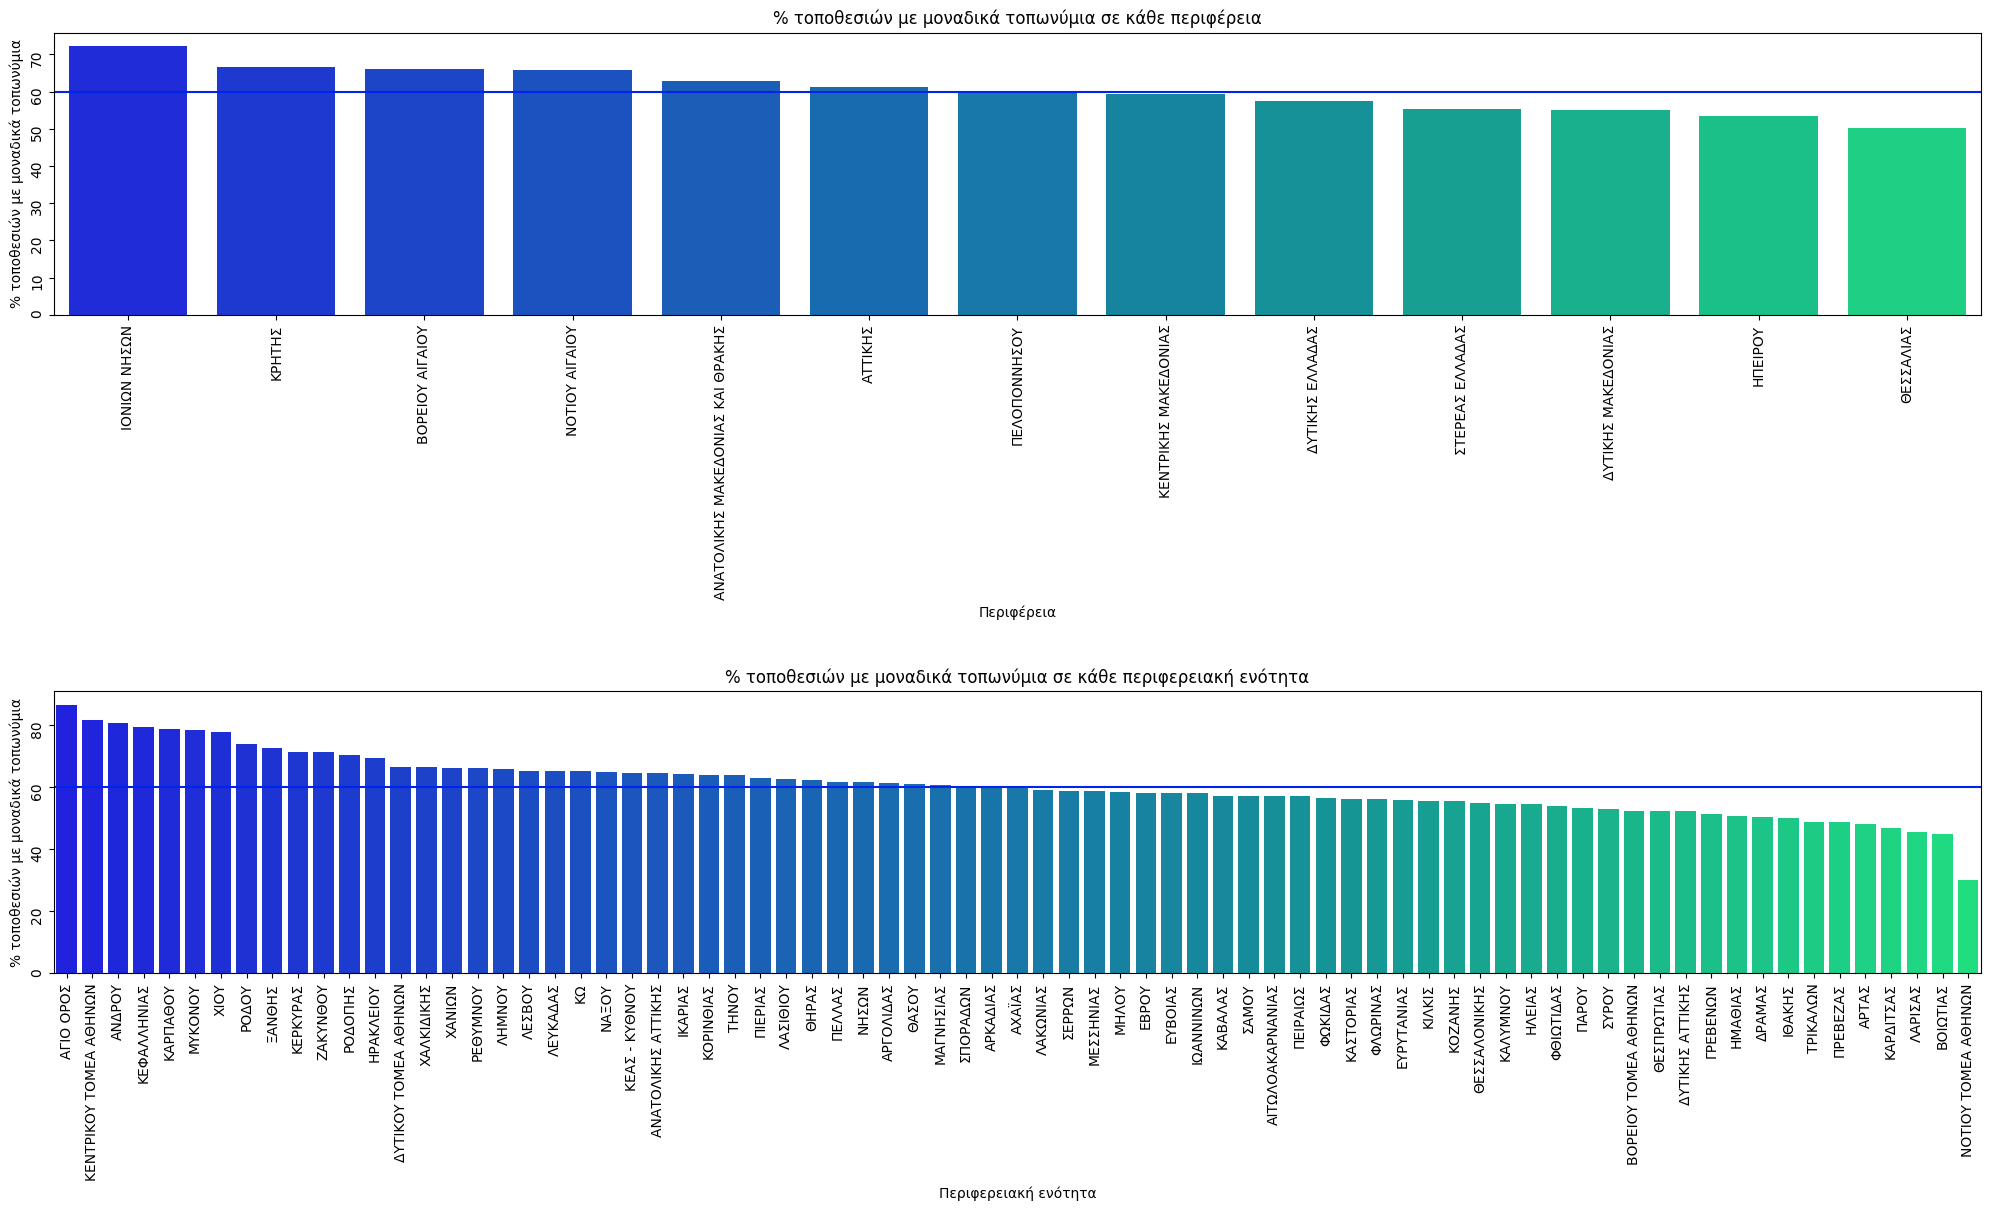

In [ ]:
# Join both plots
fig, axs = plt.subplots(2, 1, figsize = (20, 10))
fig.tight_layout(h_pad = 25)

fig = sns.barplot(x = [perif for perif in prop_unique_perif.index], y = prop_unique_perif['prop_perifereia'], palette = 'winter', ax = axs[0])
# fig.set_title('% of towns with unique names per region')
fig.set_title('% de localidades con nombres únicos por región')
fig.set_title('% τοποθεσιών με μοναδικά τοπωνύμια σε κάθε περιφέρεια')
axs[0].tick_params(labelrotation=90)
fig.axhline(60)
# fig.set_ylabel('% of towns with unique names')
fig.set_ylabel('% de localidades con nombres únicos')
fig.set_ylabel('% τοποθεσιών με μοναδικά τοπωνύμια')

fig.set_xlabel('Región')
fig.set_xlabel('Περιφέρεια')

fig = sns.barplot(x = [nomos for nomos in prop_unique_nomos.index], y = prop_unique_nomos['prop_nomos'], palette = 'winter', ax = axs[1])
# fig.set_title('% of towns with unique names per province')
fig.set_title('% de localidades con nombres únicos por provincia')
fig.set_title('% τοποθεσιών με μοναδικά τοπωνύμια σε κάθε περιφερειακή ενότητα')
axs[1].tick_params(labelrotation=90)
fig.axhline(60)
# fig.set_ylabel('% of towns with unique names')
fig.set_ylabel('% de localidades con nombres únicos')
fig.set_ylabel('% τοποθεσιών με μοναδικά τοπωνύμια')
# fig.set_xlabel('Province')
# fig.set_xlabel('Provincia') 
fig.set_xlabel('Περιφερειακή ενότητα') 



In [ ]:
# Join both plots
fig, axs = plt.subplots(2, 1, figsize = (20, 10))
fig.tight_layout(h_pad = 25)

fig = sns.barplot(x = [perif for perif in prop_unique_perif.index], y = prop_unique_perif['prop_perifereia'], palette = 'winter', ax = axs[0])
# fig.set_title('% of towns with unique names per region')
fig.set_title('% de localidades con nombres únicos por región')
fig.set_title('% τοποθεσιών με μοναδικά τοπωνύμια σε κάθε περιφέρεια')
axs[0].tick_params(labelrotation=90)
fig.axhline(60)
# fig.set_ylabel('% of towns with unique names')
fig.set_ylabel('% de localidades con nombres únicos')
fig.set_ylabel('% τοποθεσιών με μοναδικά τοπωνύμια')

fig.set_xlabel('Región')
fig.set_xlabel('Περιφέρεια')

fig = sns.barplot(x = [nomos for nomos in prop_unique_nomos.index], y = prop_unique_nomos['prop_nomos'], palette = 'winter', ax = axs[1])
# fig.set_title('% of towns with unique names per province')
fig.set_title('% de localidades con nombres únicos por provincia')
fig.set_title('% τοποθεσιών με μοναδικά τοπωνύμια σε κάθε περιφερειακή ενότητα')
axs[1].tick_params(labelrotation=90)
fig.axhline(60)
# fig.set_ylabel('% of towns with unique names')
fig.set_ylabel('% de localidades con nombres únicos')
fig.set_ylabel('% τοποθεσιών με μοναδικά τοπωνύμια')
# fig.set_xlabel('Province')
# fig.set_xlabel('Provincia') 
fig.set_xlabel('Περιφερειακή ενότητα') 



In [ ]:
import plotly.graph_objs as go

# Create the first bar chart
fig1 = go.Bar(
    x = [perif for perif in prop_unique_perif.index],
    y = prop_unique_perif['prop_perifereia'],
    marker = dict(color = 'blue'),
    name = '% de localidades con nombres únicos por región'
)

# Create the second bar chart
fig2 = go.Bar(
    x = [nomos for nomos in prop_unique_nomos.index],
    y = prop_unique_nomos['prop_nomos'],
    marker = dict(color = 'blue'),
    name = '% de localidades con nombres únicos por provincia'
)

# Set the layout
layout = go.Layout(
    title = '% de localidades con nombres únicos por región y provincia',
    xaxis = dict(title = 'Región/Provincia'),
    yaxis = dict(title = '% de localidades con nombres únicos'),
    barmode = 'group',
    bargap = 0.15,
    bargroupgap = 0.1
)

# Create the figure
fig = go.Figure(data = [fig1, fig2], layout = layout)

# Show the figure
fig.show()

As with every written language, some characters and combinations appear frequently, while others tend to be rare. Unexpectedly, the Greek language is no exception. As an example, the letters ι (iota) and υ (upsilon) are both read as [i] when alone. However, when they appear after a vowel, their pronunciation change: for instance, αι (ai) is read as "e" and ευ (ey) is pronounced [ev]. Bue to historical reasons, orthography has preserved them instead of replacing them by the literal sounds they generate. But in several unfrequent cases, these pronunciation changes do not occur and need to be marked with ϊ or, even rarer, ϋ. This render some toponyms a bit more eye-catching than usual.

# Table with distribution of toponym suffixes for plotting in Tableau

In [ ]:
# Copy the main dataframe
td_df = df.copy() # Tableau distribution

In [ ]:
# Create a new column with a boolean indicating whether the town name ends in the specified suffix
suffixes = [
    'αιίκα',
    'άτα',
    'άτικα',
    'ανά',
    'ές',
    'έ',
    'οβο',
    'αίοι',
    'άδες',
]

for suffix in suffixes:
    td_df[f'{suffix}'] = td_df['location'].apply(lambda x: x.endswith(suffix))

In [ ]:
# Save the dataframe to a csv file
td_filename = 'files/hellas_db_tableau_distribution.csv'
td_df.to_csv(td_filename, index = False)